<a href="https://colab.research.google.com/github/leonardo3108/robustez-query/blob/main/code/analysis/Analysis_Discount_Gain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação ambiente

## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [2]:
!wget https://raw.githubusercontent.com/leonardo3108/robustez-query/main/code/util/util_bd_dataframe.py  -P util
!wget https://raw.githubusercontent.com/leonardo3108/robustez-query/main/code/util/util_noise_functions.py  -P util

--2021-12-08 20:18:09--  https://raw.githubusercontent.com/leonardo3108/robustez-query/main/code/util/util_bd_dataframe.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26101 (25K) [text/plain]
Saving to: ‘util/util_bd_dataframe.py.8’

util_bd_dataframe.p 100%[===================>]  25.49K  --.-KB/s    in 0.001s  

2021-12-08 20:18:10 (20.8 MB/s) - ‘util/util_bd_dataframe.py.8’ saved [26101/26101]

--2021-12-08 20:18:10--  https://raw.githubusercontent.com/leonardo3108/robustez-query/main/code/util/util_noise_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request 

In [3]:
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_calculated_metric.csv -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_noise_kind.csv -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_search_context.csv -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_original_query.csv -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_noisy_query.csv -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_model.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_judment.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_metric.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_passage_with_judment.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_ranking_function.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_text_base.csv  -P data
! wget -nc https://raw.githubusercontent.com/leonardo3108/robustez-query/main/data/tab_text_search_engine.csv  -P data

File ‘data/tab_calculated_metric.csv’ already there; not retrieving.

File ‘data/tab_noise_kind.csv’ already there; not retrieving.

File ‘data/tab_search_context.csv’ already there; not retrieving.

File ‘data/tab_original_query.csv’ already there; not retrieving.

File ‘data/tab_noisy_query.csv’ already there; not retrieving.

File ‘data/tab_model.csv’ already there; not retrieving.

File ‘data/tab_judment.csv’ already there; not retrieving.

File ‘data/tab_metric.csv’ already there; not retrieving.

File ‘data/tab_passage_with_judment.csv’ already there; not retrieving.

File ‘data/tab_ranking_function.csv’ already there; not retrieving.

File ‘data/tab_text_base.csv’ already there; not retrieving.

File ‘data/tab_text_search_engine.csv’ already there; not retrieving.



In [4]:
from util import util_bd_dataframe  as util_bd_pandas

In [5]:
import pandas as pd
pd.set_option("display.max_columns", None)  # "display.max_rows", None,


In [6]:
df_original_query, _ = util_bd_pandas.read_df_original_query_and_dict_val_idg()
df_original_query.shape, df_original_query.columns

((108, 4), Index(['cod', 'language', 'text', 'val_idcg10'], dtype='object'))

In [7]:
df_noise_kind = util_bd_pandas.read_df_noise_kind()
df_noise_kind.shape, df_noise_kind.columns

((9, 3), Index(['cod', 'descr', 'abbreviation'], dtype='object'))

In [8]:
df_search_context=util_bd_pandas.read_df_search_context()
df_search_context.shape, df_search_context.columns

((14, 6),
 Index(['cod', 'abbreviation_ranking_function', 'abbreviation_text_base',
        'abbreviation_text_search_engine', 'abbreviation_model',
        'abbreviation'],
       dtype='object'))

In [9]:
df_noisy_query_with_extra_columns = util_bd_pandas.read_df_noisy_query_with_extra_columns()
df_noisy_query_with_extra_columns.shape, df_noisy_query_with_extra_columns.columns

((918, 7), Index(['cod_original_query', 'language', 'cod_noise_kind', 'text',
        'qtd_tokens', 'qtd_tokens_passing', 'qtd_tokens_missing'],
       dtype='object'))

In [10]:
pd.set_option("display.max_rows", 15)
df_original_query.query("language=='pt'")


,cod,language,text,val_idcg10
54,23849,pt,são informações públicas de registros de natur...,31.804915
55,42255,pt,salário médio de higienista dental em nebraska,18.771051
56,47210,pt,custo médio de alteração do vestido de noiva,28.182677
57,67316,pt,pode a febre causar aborto espontâneo no iníci...,26.849343
58,118440,pt,definir bmt medical,31.804915
...,...,...,...,...
103,1132532,pt,analista de dados de renda média anual,31.804915
104,1133579,pt,como o tecido de granulação começa,22.154397
105,1136043,pt,diferença entre um hotel e motel,26.849343
106,1136047,pt,diferença entre a estratégia de uma empresa e ...,17.676611


In [11]:
df_calculated_metric = util_bd_pandas.read_df_calculated_metric_with_label() #parm_list_search_context=util_bd_pandas.list_search_context_pt
df_calculated_metric.shape, df_calculated_metric.columns

((18954, 16), Index(['date_time_execution', 'cod_metric', 'cod_original_query',
        'cod_noise_kind', 'cod_search_context', 'value', 'qtd_judment_assumed',
        'language', 'noise_kind', 'abbrev_noise_kind', 'search_engine',
        'search_context', 'text', 'qtd_tokens', 'qtd_tokens_passing',
        'qtd_tokens_missing'],
       dtype='object'))

In [12]:
df_calculated_metric["search_context"].unique()

array(['TREC 2020 Judment EN-BM25',
       'TREC 2020 Judment EN-DPR:facebook-nq-base', 'TREC 2020 Full-BM25',
       'TREC 2020 Full-ReRank@1000:mono-t5-castorini-base-msmarco',
       'TREC 2020 Judment EN-ReRank@100:mono-t5-castorini-base-msmarco',
       'TREC 2020 Judment PT-BM25',
       'TREC 2020 Judment PT-DPR:castorini-mdpr-nq',
       'TREC 2020 Judment PT-ReRank@100:mono-mt5-unicamp-base-multi-msmarco',
       'TREC 2020 Judment PT-ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco',
       'TREC 2020 Judment PT-ReRank@100:mono-ptt5-unicamp-small_pt_vocab',
       'TREC 2020 Judment PT-ReRank@100:mono-ptt5-unicamp-base_pt_vocab',
       'TREC 2020 Judment PT-ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k',
       'TREC 2020 Judment PT-ReRank@100:mono-ptt5-unicamp-base_t5_vocab',
       'TREC 2020 Judment PT-DPR:voidful-dpr-mdpr-bert-base'],
      dtype=object)

In [13]:
df_calculated_metric["search_context"] = df_calculated_metric["search_context"].str.replace("TREC 2020 Judment PT-", "Judment-")
df_calculated_metric["search_context"] = df_calculated_metric["search_context"].str.replace("TREC 2020 Judment EN-", "Judment-")
df_calculated_metric["search_context"] = df_calculated_metric["search_context"].str.replace("TREC 2020 Judment PT-", "Judment-")
df_calculated_metric["search_context"] = df_calculated_metric["search_context"].str.replace("TREC 2020 Full-", "Full-")

In [14]:
df_calculated_metric["search_context"].unique()

array(['Judment-BM25', 'Judment-DPR:facebook-nq-base', 'Full-BM25',
       'Full-ReRank@1000:mono-t5-castorini-base-msmarco',
       'Judment-ReRank@100:mono-t5-castorini-base-msmarco',
       'Judment-DPR:castorini-mdpr-nq',
       'Judment-ReRank@100:mono-mt5-unicamp-base-multi-msmarco',
       'Judment-ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco',
       'Judment-ReRank@100:mono-ptt5-unicamp-small_pt_vocab',
       'Judment-ReRank@100:mono-ptt5-unicamp-base_pt_vocab',
       'Judment-ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k',
       'Judment-ReRank@100:mono-ptt5-unicamp-base_t5_vocab',
       'Judment-DPR:voidful-dpr-mdpr-bert-base'], dtype=object)

In [15]:
df_calculated_metric["noise_kind"].unique()

array(['No changes in the text', 'Permutation of words: first and second',
       'Permutation of words: last and penultimate',
       'Permutation of words: first and last',
       'Deletion of words in positions: [2]',
       'Deletion of words in positions: [penultimate]',
       'Deletion of words by probability: 20% (at least the central word)',
       'Back translation (with portuguese)',
       'With one typographical error'], dtype=object)

In [16]:
df_calculated_metric["noise_kind"] = df_calculated_metric["abbrev_noise_kind"]
df_calculated_metric = df_calculated_metric.drop(["abbrev_noise_kind"], axis = 1)

In [17]:
df_calculated_metric["noise_kind"].unique()

array(['No changes', 'Permute: 1st x 2nd', 'Permute: last x penult',
       'Permutate: first x last', 'Delete: 2nd', 'Delete: penult',
       'Delete: 20%', 'Back translation en-pt', 'Typo'], dtype=object)

In [18]:
df_original_query_with_ndcg = pd.merge(df_original_query, df_calculated_metric.query("cod_noise_kind == 0 & cod_metric == 'nDCG@10'"), left_on=['cod','language'], right_on=['cod_original_query', 'language'],suffixes=(None,'_calculated') )
df_original_query_with_ndcg.shape, df_original_query_with_ndcg.columns

((756, 18),
 Index(['cod', 'language', 'text', 'val_idcg10', 'date_time_execution',
        'cod_metric', 'cod_original_query', 'cod_noise_kind',
        'cod_search_context', 'value', 'qtd_judment_assumed', 'noise_kind',
        'search_engine', 'search_context', 'text_calculated', 'qtd_tokens',
        'qtd_tokens_passing', 'qtd_tokens_missing'],
       dtype='object'))

## Dropping contexts with poor results

In [19]:
df_original_query_with_ndcg.query("value==0").groupby(['cod_search_context','search_context','language']).agg({'value': [ 'count']})

,,,value
,,,count
cod_search_context,search_context,language,
2,Judment-DPR:facebook-nq-base,en,2
3,Full-BM25,en,2
4,Judment-BM25,en,4
5,Judment-ReRank@100:mono-t5-castorini-base-msmarco,en,2
6,Judment-BM25,pt,8
7,Judment-DPR:castorini-mdpr-nq,pt,3
8,Judment-ReRank@100:mono-mt5-unicamp-base-multi-msmarco,pt,2
9,Judment-ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,pt,2


In [20]:
df_original_query_with_ndcg.query("value!=0").groupby(['language','cod_search_context','search_context']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max'], 
   'qtd_tokens': ['mean', 'count', 'median', 'min', 'max'],   
   })

value  \
                                                                                    mean   
language cod_search_context search_context                                                 
en       1                  Full-ReRank@1000:mono-t5-castorini-base-msmarco     0.669499   
         2                  Judment-DPR:facebook-nq-base                        0.523497   
         3                  Full-BM25                                           0.450613   
         4                  Judment-BM25                                        0.441125   
         5                  Judment-ReRank@100:mono-t5-castorini-base-msmarco   0.687046   
pt       6                  Judment-BM25                                        0.438568   
         7                  Judment-DPR:castorini-mdpr-nq                       0.352163   
         8                  Judment-ReRank@100:mono-mt5-unicamp-base-multi-...  0.632321   
         9                  Judment-ReRank@100:mono-mt5-unicamp-base-en-pt-...  0.643264   
         10                 Judment-ReRank@100:mono-ptt5-unicamp-small_pt_v...  0.176525   
         11                 Judment-ReRank@100:mono-ptt5-unicamp-base_pt_vocab  0.109678   
         12                 Judment-ReRank@100:mono-ptt5-unicamp-base-pt-ms...  0.624818   
         13                 Judment-ReRank@100:mono-ptt5-unicamp-base_t5_vocab  0.146857   
         14                 Judment-DPR:voidful-dpr-mdpr-bert-base              0.186761   

                                                                                      \
                                                                               count   
language cod_search_context search_context                                             
en       1                  Full-ReRank@1000:mono-t5-castorini-base-msmarco       54   
         2                  Judment-DPR:facebook-nq-base                          52   
         3                  Full-BM25                                             52   
         4                  Judment-BM25                                          50   
         5                  Judment-ReRank@100:mono-t5-castorini-base-msmarco     52   
pt       6                  Judment-BM25                                          46   
         7                  Judment-DPR:castorini-mdpr-nq                         51   
         8                  Judment-ReRank@100:mono-mt5-unicamp-base-multi-...    52   
         9                  Judment-ReRank@100:mono-mt5-unicamp-base-en-pt-...    52   
         10                 Judment-ReRank@100:mono-ptt5-unicamp-small_pt_v...    36   
         11                 Judment-ReRank@100:mono-ptt5-unicamp-base_pt_vocab    29   
         12                 Judment-ReRank@100:mono-ptt5-unicamp-base-pt-ms...    52   
         13                 Judment-ReRank@100:mono-ptt5-unicamp-base_t5_vocab    36   
         14                 Judment-DPR:voidful-dpr-mdpr-bert-base                37   

                                                                                          \
                                                                                  median   
language cod_search_context search_context                                                 
en       1                  Full-ReRank@1000:mono-t5-castorini-base-msmarco     0.695759   
         2                  Judment-DPR:facebook-nq-base                        0.528226   
         3                  Full-BM25                                           0.419263   
         4                  Judment-BM25                                        0.385414   
         5                  Judment-ReRank@100:mono-t5-castorini-base-msmarco   0.700938   
pt       6                  Judment-BM25                                        0.389130   
         7                  Judment-DPR:castorini-mdpr-nq                       0.318770   
         8                  Judment-ReRank@100:mono-mt5-unicamp-base-multi-...  0.661697   
         

To drop search context with more than 23% of ndcg==0 and ndcg.mean < BM25.ndcg * 50%

In [21]:
list_context_to_drop = [10, 11, 13, 14]

In [22]:
df_calculated_metric.shape

(18954, 15)

In [23]:
df_calculated_metric = df_calculated_metric.query("cod_search_context not in " + str(list_context_to_drop))
df_original_query_with_ndcg = df_original_query_with_ndcg.query("cod_search_context not in " + str(list_context_to_drop))

In [24]:
df_calculated_metric.shape

(13770, 15)

In [25]:
df_original_query_with_ndcg.query("value!=0").groupby(['language','cod_search_context','search_context'],as_index=False).agg({
   'value': ['mean', 'count', 'median', 'min', 'max'], 
   'qtd_tokens': ['mean', 'count', 'median', 'min', 'max'],   
   })

language cod_search_context  \
                                
0       en                  1   
1       en                  2   
2       en                  3   
3       en                  4   
4       en                  5   
5       pt                  6   
6       pt                  7   
7       pt                  8   
8       pt                  9   
9       pt                 12   

                                      search_context     value        \
                                                          mean count   
0    Full-ReRank@1000:mono-t5-castorini-base-msmarco  0.669499    54   
1                       Judment-DPR:facebook-nq-base  0.523497    52   
2                                          Full-BM25  0.450613    52   
3                                       Judment-BM25  0.441125    50   
4  Judment-ReRank@100:mono-t5-castorini-base-msmarco  0.687046    52   
5                                       Judment-BM25  0.438568    46   
6                      Judment-DPR:castorini-mdpr-nq  0.352163    51   
7  Judment-ReRank@100:mono-mt5-unicamp-base-multi...  0.632321    52   
8  Judment-ReRank@100:mono-mt5-unicamp-base-en-pt...  0.643264    52   
9  Judment-ReRank@100:mono-ptt5-unicamp-base-pt-m...  0.624818    52   

                                qtd_tokens                       
     median       min       max       mean count median min max  
0  0.695759  0.050171  1.000000   6.185185    54      6   2  16  
1  0.528226  0.029389  1.000000   6.211538    52      6   2  16  
2  0.419263  0.009089  0.977854   6.192308    52      6   2  16  
3  0.385414  0.031442  0.941880   6.220000    50      6   2  16  
4  0.700938  0.063373  1.000000   6.269231    52      6   2  16  
5  0.389130  0.028381  0.950091   6.869565    46      6   2  15  
6  0.318770  0.010224  1.000000   6.725490    51      6   2  15  
7  0.661697  0.020151  1.000000   6.788462    52      6   2  15  
8  0.678095  0.020151  1.000000   6.788462    52      6   2  15  
9  0.655771  0.034876  1.000000   6.788462    52      6   2  15

## Dropping calculus for queryes with ndcg=0 and noisy query with ndcg <> 0

In [26]:
df_original_query_with_ndcg.query("value==0").groupby(['cod_search_context','search_context', 'language']).agg({'value': [ 'count']})

,,,value
,,,count
cod_search_context,search_context,language,
2,Judment-DPR:facebook-nq-base,en,2
3,Full-BM25,en,2
4,Judment-BM25,en,4
5,Judment-ReRank@100:mono-t5-castorini-base-msmarco,en,2
6,Judment-BM25,pt,8
7,Judment-DPR:castorini-mdpr-nq,pt,3
8,Judment-ReRank@100:mono-mt5-unicamp-base-multi-msmarco,pt,2
9,Judment-ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,pt,2


To drop calculus for original queries with ndcg==0 in contexts

In [27]:
df_original_query_ndcg_zero = df_original_query_with_ndcg.query("value==0")[['cod_original_query', 'cod_search_context', 'language']]

In [28]:
print(len(df_original_query_ndcg_zero))
df_original_query_ndcg_zero

27


,cod_original_query,cod_search_context,language
86,405163,2,en
89,405163,5,en
90,555530,4,en
105,673670,4,en
109,673670,5,en
...,...,...,...
659,1115210,8,pt
660,1115210,9,pt
663,1115210,12,pt
666,1116380,6,pt


In [29]:
list_ndcg_zero_cod_query = list(df_original_query_ndcg_zero['cod_original_query'])
list_ndcg_zero_cod_search_context = list(df_original_query_ndcg_zero[ 'cod_search_context'])
list_ndcg_zero_language = list(df_original_query_ndcg_zero[ 'language'])

In [30]:
print(list_ndcg_zero_cod_query)
print(list_ndcg_zero_cod_search_context)
print(list_ndcg_zero_language)

[405163, 405163, 555530, 673670, 673670, 938400, 1051399, 1051399, 1116380, 1116380, 42255, 118440, 336901, 673670, 673670, 673670, 673670, 938400, 1051399, 1110678, 1115210, 1115210, 1115210, 1115210, 1115210, 1116380, 1116380]
[2, 5, 4, 4, 5, 3, 4, 3, 4, 2, 6, 6, 6, 6, 8, 9, 12, 6, 6, 7, 6, 7, 8, 9, 12, 6, 7]
['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt', 'pt']


In [31]:
lista_a_excluir = []
for ndx in range(len(list_ndcg_zero_cod_query)):
  df = df_calculated_metric.query("cod_noise_kind != 0 and cod_metric == 'nDCG@10' and value!=0 and language== '" + list_ndcg_zero_language[ndx] + "' and cod_search_context == " + str(list_ndcg_zero_cod_search_context[ndx]) + " and cod_original_query == " + str(list_ndcg_zero_cod_query[ndx]) )
  for row in df.itertuples():
    print(row)
    # print(row.cod_original_query, row.cod_noise_kind, row.cod_search_context)
    lista_a_excluir.append([row.cod_original_query, row.cod_noise_kind, row.cod_search_context, row.language])

Pandas(Index=1879, date_time_execution='2021-11-22 10:46:38', cod_metric='nDCG@10', cod_original_query=405163, cod_noise_kind=2, cod_search_context=2, value=0.02839466719473816, qtd_judment_assumed=0, language='en', noise_kind='Permute: last x penult', search_engine='Elastic', search_context='Judment-DPR:facebook-nq-base', text='is caffeine narcotic an', qtd_tokens=4, qtd_tokens_passing=0, qtd_tokens_missing=0)
Pandas(Index=2689, date_time_execution='2021-11-22 10:46:51', cod_metric='nDCG@10', cod_original_query=405163, cod_noise_kind=3, cod_search_context=2, value=0.059512475945809086, qtd_judment_assumed=0, language='en', noise_kind='Permutate: first x last', search_engine='Elastic', search_context='Judment-DPR:facebook-nq-base', text='narcotic caffeine an is', qtd_tokens=4, qtd_tokens_passing=0, qtd_tokens_missing=0)
Pandas(Index=3499, date_time_execution='2021-11-22 10:47:04', cod_metric='nDCG@10', cod_original_query=405163, cod_noise_kind=4, cod_search_context=2, value=0.063620788

In [32]:
print(len(lista_a_excluir))
print(lista_a_excluir)

29
[[405163, 2, 2, 'en'], [405163, 3, 2, 'en'], [405163, 4, 2, 'en'], [405163, 5, 2, 'en'], [405163, 6, 2, 'en'], [405163, 8, 2, 'en'], [405163, 2, 5, 'en'], [405163, 3, 5, 'en'], [405163, 7, 5, 'en'], [405163, 8, 5, 'en'], [555530, 5, 4, 'en'], [555530, 6, 4, 'en'], [938400, 4, 3, 'en'], [938400, 5, 3, 'en'], [938400, 7, 3, 'en'], [1051399, 4, 4, 'en'], [1051399, 5, 4, 'en'], [1051399, 6, 4, 'en'], [1051399, 4, 3, 'en'], [1051399, 6, 3, 'en'], [1116380, 8, 4, 'en'], [1116380, 1, 2, 'en'], [938400, 4, 6, 'pt'], [938400, 7, 6, 'pt'], [1051399, 4, 6, 'pt'], [1110678, 5, 7, 'pt'], [1116380, 2, 7, 'pt'], [1116380, 3, 7, 'pt'], [1116380, 5, 7, 'pt']]


In [33]:
df_calculated_metric.shape

(13770, 15)

In [34]:
df_dg_nDCG10 = df_calculated_metric.query("cod_metric == 'DG:nDCG@10'")
df_nDCG10 = df_calculated_metric.query("cod_metric == 'nDCG@10'")

In [35]:
df_dg_nDCG10.shape, df_nDCG10.shape

((4590, 15), (4590, 15))

In [36]:
del df_calculated_metric

In [37]:
# para cada tupla, exclui todas a métrica DG:nDCG@10
for cod_original_query, cod_noise_kind, cod_search_context, language in lista_a_excluir:
  df_dg_nDCG10 = df_dg_nDCG10.drop(df_dg_nDCG10.query("language == '" + language + "'and cod_original_query == "+ str(cod_original_query) + "and cod_noise_kind == " + str(cod_noise_kind) + " and cod_search_context == " + str(cod_search_context)).index)


In [38]:
df_dg_nDCG10.shape, df_nDCG10.shape

((4561, 15), (4590, 15))

In [39]:
pd.set_option("display.max_rows", None)
df_dg_nDCG10.query("cod_noise_kind!=0").groupby(['noise_kind', 'language'],as_index=False).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

noise_kind language     value                            \
                                          mean count    median       min   
0    Back translation en-pt       en -0.101767   268  0.000000 -0.999990   
1    Back translation en-pt       pt  0.071001   269  0.000000 -0.999989   
2               Delete: 20%       en -0.018506   266 -0.046232 -0.999990   
3               Delete: 20%       pt -0.239665   270 -0.097466 -0.999987   
4               Delete: 2nd       en -0.141870   266 -0.030770 -0.999989   
5               Delete: 2nd       pt -0.104686   268  0.000000 -0.999989   
6            Delete: penult       en -0.010828   266 -0.065756 -0.999990   
7            Delete: penult       pt -0.072787   268 -0.005649 -0.999989   
8   Permutate: first x last       en  0.011086   268  0.000000 -0.999974   
9   Permutate: first x last       pt -0.006218   269  0.000000 -0.999915   
10       Permute: 1st x 2nd       en  0.021514   269  0.000000 -0.767624   
11       Permute: 1st x 2nd       pt  0.014603   270  0.000000 -0.999108   
12   Permute: last x penult       en -0.012134   268  0.000000 -0.917207   
13   Permute: last x penult       pt  0.018238   269  0.000000 -0.999023   
14                     Typo       en  0.176169   267  0.000000 -0.999990   

                                   
          max       std       var  
0    2.999431  0.429551  0.184514  
1   12.790963  0.939657  0.882955  
2   32.214343  2.152046  4.631302  
3    7.038340  0.607012  0.368463  
4    5.558448  0.591479  0.349847  
5    1.042225  0.336360  0.113138  
6   32.214343  2.131220  4.542099  
7    9.271356  0.823820  0.678680  
8    3.974044  0.368462  0.135764  
9    5.067674  0.426169  0.181620  
10   4.060133  0.311969  0.097325  
11   7.476386  0.487157  0.237321  
12   0.623313  0.146635  0.021502  
13   5.611328  0.442636  0.195927  
14  33.608316  2.165345  4.688720

In [40]:
pd.set_option("display.max_rows", None)
df_dg_nDCG10.query("cod_noise_kind!=0").groupby(['language'],as_index=False).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

language     value                                                      
                mean count median       min        max       std       var
0       en -0.009481  2138    0.0 -0.999990  33.608316  1.351742  1.827207
1       pt -0.045670  1883    0.0 -0.999989  12.790963  0.622650  0.387693

In [41]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_nDCG10.groupby(['cod_search_context', 'search_context', 'language'],as_index=False).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

cod_search_context                                     search_context  \
                                                                          
0                  1    Full-ReRank@1000:mono-t5-castorini-base-msmarco   
1                  2                       Judment-DPR:facebook-nq-base   
2                  3                                          Full-BM25   
3                  4                                       Judment-BM25   
4                  5  Judment-ReRank@100:mono-t5-castorini-base-msmarco   
5                  6                                       Judment-BM25   
6                  7                      Judment-DPR:castorini-mdpr-nq   
7                  8  Judment-ReRank@100:mono-mt5-unicamp-base-multi...   
8                  9  Judment-ReRank@100:mono-mt5-unicamp-base-en-pt...   
9                 12  Judment-ReRank@100:mono-ptt5-unicamp-base-pt-m...   

  language     value                                                     
                mean count    median  min       max       std       var  
0       en  0.596688   486  0.657406  0.0  1.000000  0.273390  0.074742  
1       en  0.451078   486  0.429201  0.0  1.000000  0.272219  0.074103  
2       en  0.393085   486  0.367326  0.0  0.982036  0.269416  0.072585  
3       en  0.379750   486  0.340821  0.0  0.998167  0.266896  0.071233  
4       en  0.609292   486  0.652085  0.0  1.000000  0.267347  0.071474  
5       pt  0.351030   432  0.326156  0.0  0.950091  0.273466  0.074784  
6       pt  0.298360   432  0.271026  0.0  1.000000  0.242260  0.058690  
7       pt  0.567419   432  0.624895  0.0  1.000000  0.268510  0.072098  
8       pt  0.565119   432  0.617404  0.0  1.000000  0.267006  0.071292  
9       pt  0.555036   432  0.591071  0.0  1.000000  0.265971  0.070740

## Removing "no changes" from df_nDCG10

In [42]:
df_dg_nDCG10 = df_dg_nDCG10.query("cod_noise_kind != 0")

In [43]:
df_dg_nDCG10.shape, df_nDCG10.shape

((4021, 15), (4590, 15))

In [44]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_dg_nDCG10.query("cod_noise_kind!=0").groupby(['cod_search_context', 'search_context', 'language'],as_index=False).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

cod_search_context                                     search_context  \
                                                                          
0                  1    Full-ReRank@1000:mono-t5-castorini-base-msmarco   
1                  2                       Judment-DPR:facebook-nq-base   
2                  3                                          Full-BM25   
3                  4                                       Judment-BM25   
4                  5  Judment-ReRank@100:mono-t5-castorini-base-msmarco   
5                  6                                       Judment-BM25   
6                  7                      Judment-DPR:castorini-mdpr-nq   
7                  8  Judment-ReRank@100:mono-mt5-unicamp-base-multi...   
8                  9  Judment-ReRank@100:mono-mt5-unicamp-base-en-pt...   
9                 12  Judment-ReRank@100:mono-ptt5-unicamp-base-pt-m...   

  language     value                                                           
                mean count    median       min        max       std       var  
0       en -0.089761   432 -0.017366 -0.999990   4.215114  0.459090  0.210763  
1       en -0.052404   425 -0.020364 -0.999987   4.060133  0.524878  0.275497  
2       en  0.117110   427  0.000000 -0.999990  33.608316  2.766843  7.655419  
3       en  0.056462   426  0.000000 -0.999988   9.311809  0.950782  0.903986  
4       en -0.077758   428 -0.005203 -0.999990   1.806570  0.296076  0.087661  
5       pt -0.020014   375  0.000000 -0.999987   9.271356  0.579594  0.335929  
6       pt  0.053181   374 -0.001772 -0.999989  12.790963  1.165628  1.358690  
7       pt -0.068468   378  0.000000 -0.999988   2.096240  0.308026  0.094880  
8       pt -0.100876   378 -0.014460 -0.999988   0.915624  0.271177  0.073537  
9       pt -0.090925   378  0.000000 -0.999989   0.712181  0.271021  0.073452

## Unite 3 rerank models (pt)

In [45]:
df_dg_nDCG10[df_dg_nDCG10['search_context'].str.contains('ReRank')].shape

(1994, 15)

In [46]:
df_dg_nDCG10[df_dg_nDCG10['language']=='pt'].shape

(1883, 15)

In [47]:
df_dg_nDCG10[(df_dg_nDCG10['language']=='pt') & (df_dg_nDCG10['search_context'].str.contains('ReRank'))].shape

(1134, 15)

In [48]:
# df_dg_nDCG10_3_contexts = df_dg_nDCG10
#noise_kind, cod_metric, cod_noise_kind, cod_search_context, language
dict_temp = {}
for index, row in df_dg_nDCG10[(df_dg_nDCG10['language']=='pt') & (df_dg_nDCG10['search_context'].str.contains('ReRank'))].iterrows():
    # for key in row.keys():
    #  if key != 'value':
    #    print(key)
    if (row.cod_original_query, row.cod_metric, row.cod_noise_kind) in dict_temp:
      # print("já tem", row.cod_original_query, row.cod_metric, row.cod_noise_kind, "somando", row.value)
      dict_temp[(row.cod_original_query, row.cod_metric, row.cod_noise_kind)] += row.value
    else:
      # print("não tem", row.cod_original_query, row.cod_metric, row.cod_noise_kind, "assumindo", row.value)
      dict_temp[(row.cod_original_query, row.cod_metric, row.cod_noise_kind)] = row.value




In [49]:
len(dict_temp),df_dg_nDCG10.shape

(378, (4021, 15))

In [50]:
#cod_original_query = 1136962
#for cod_original_query in df_original_query.index:
#  for cod_search_context in [8, 9, 12]:
#    print(cod_original_query, cod_search_context, dict_temp[(cod_original_query , 'DG:nDCG@10', 5, cod_search_context)])

In [51]:
# Basta um dos 3 para pegar informações comuns
for index, row in df_dg_nDCG10[(df_dg_nDCG10['language']=='pt') & (df_dg_nDCG10['cod_search_context']==9)].iterrows(): # just replicate one of the 3
    new_record = {}
    for key in row.keys():
      if key == 'value':
        new_record['value'] = dict_temp[(row.cod_original_query, row.cod_metric, row.cod_noise_kind)] / 3 # putting average value
      else:
        new_record[key] = row[key]
    new_record['search_context'] = 'Judment-ReRank@100'
    new_record['cod_search_context'] = 99
    df_dg_nDCG10 = df_dg_nDCG10.append(new_record, ignore_index=True)

In [52]:
df_dg_nDCG10[df_dg_nDCG10['language']=='pt'].shape

(2261, 15)

In [53]:
df_dg_nDCG10[(df_dg_nDCG10['language']=='pt') & (df_dg_nDCG10['search_context'].str.contains('ReRank'))].shape

(1512, 15)

In [54]:
 df_dg_nDCG10 = df_dg_nDCG10.query('cod_search_context not in [8,9,12]')

In [55]:
df_dg_nDCG10[(df_dg_nDCG10['language']=='pt') & (df_dg_nDCG10['search_context'].str.contains('ReRank'))].shape

(378, 15)

In [56]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_dg_nDCG10.query("language=='en'").groupby(['cod_noise_kind', 'noise_kind', 'language']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

value                  \
                                                     mean count    median   
cod_noise_kind noise_kind              language                             
1              Permute: 1st x 2nd      en        0.021514   269  0.000000   
2              Permute: last x penult  en       -0.012134   268  0.000000   
3              Permutate: first x last en        0.011086   268  0.000000   
4              Delete: 2nd             en       -0.141870   266 -0.030770   
5              Delete: penult          en       -0.010828   266 -0.065756   
6              Delete: 20%             en       -0.018506   266 -0.046232   
7              Back translation en-pt  en       -0.101767   268  0.000000   
8              Typo                    en        0.176169   267  0.000000   

                                                                      \
                                                      min        max   
cod_noise_kind noise_kind              language                        
1              Permute: 1st x 2nd      en       -0.767624   4.060133   
2              Permute: last x penult  en       -0.917207   0.623313   
3              Permutate: first x last en       -0.999974   3.974044   
4              Delete: 2nd             en       -0.999989   5.558448   
5              Delete: penult          en       -0.999990  32.214343   
6              Delete: 20%             en       -0.999990  32.214343   
7              Back translation en-pt  en       -0.999990   2.999431   
8              Typo                    en       -0.999990  33.608316   

                                                                     
                                                      std       var  
cod_noise_kind noise_kind              language                      
1              Permute: 1st x 2nd      en        0.311969  0.097325  
2              Permute: last x penult  en        0.146635  0.021502  
3              Permutate: first x last en        0.368462  0.135764  
4              Delete: 2nd             en        0.591479  0.349847  
5              Delete: penult          en        2.131220  4.542099  
6              Delete: 20%             en        2.152046  4.631302  
7              Back translation en-pt  en        0.429551  0.184514  
8              Typo                    en        2.165345  4.688720

In [57]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_dg_nDCG10.query("language=='pt'").groupby(['cod_noise_kind', 'noise_kind', 'language']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

value                  \
                                                     mean count    median   
cod_noise_kind noise_kind              language                             
1              Permute: 1st x 2nd      pt        0.031945   162  0.000000   
2              Permute: last x penult  pt        0.044526   161  0.000000   
3              Permutate: first x last pt       -0.006125   161  0.000000   
4              Delete: 2nd             pt       -0.096066   160 -0.000609   
5              Delete: penult          pt       -0.018955   160 -0.008502   
6              Delete: 20%             pt       -0.208484   162 -0.050179   
7              Back translation en-pt  pt        0.126776   161  0.000000   

                                                                      \
                                                      min        max   
cod_noise_kind noise_kind              language                        
1              Permute: 1st x 2nd      pt       -0.999108   7.476386   
2              Permute: last x penult  pt       -0.999023   5.611328   
3              Permutate: first x last pt       -0.999915   5.067674   
4              Delete: 2nd             pt       -0.999988   0.999915   
5              Delete: penult          pt       -0.999989   9.271356   
6              Delete: 20%             pt       -0.999987   7.038340   
7              Back translation en-pt  pt       -0.999989  12.790963   

                                                                     
                                                      std       var  
cod_noise_kind noise_kind              language                      
1              Permute: 1st x 2nd      pt        0.619681  0.384004  
2              Permute: last x penult  pt        0.563871  0.317951  
3              Permutate: first x last pt        0.511636  0.261771  
4              Delete: 2nd             pt        0.345349  0.119266  
5              Delete: penult          pt        1.030384  1.061692  
6              Delete: 20%             pt        0.712140  0.507143  
7              Back translation en-pt  pt        1.190873  1.418179

In [58]:
df_dg_nDCG10.shape

(3265, 15)

## Removing outliers in DG:nDCG@10

In [59]:
df_dg_nDCG10['z_score'] = zscore(df_dg_nDCG10['value'])

In [60]:
df_dg_nDCG10.head()

,date_time_execution,cod_metric,cod_original_query,cod_noise_kind,cod_search_context,value,qtd_judment_assumed,language,noise_kind,search_engine,search_context,text,qtd_tokens,qtd_tokens_passing,qtd_tokens_missing,z_score
0,2021-12-03 21:01:52,DG:nDCG@10,23849,1,4,0.000000,0,en,Permute: 1st x 2nd,Elastic,Judment-BM25,naturalization are records public information,5,0,0,0.010535
1,2021-12-03 21:01:52,DG:nDCG@10,23849,1,2,-0.090789,0,en,Permute: 1st x 2nd,Elastic,Judment-DPR:facebook-nq-base,naturalization are records public information,5,0,0,-0.066230
2,2021-12-03 21:01:52,DG:nDCG@10,23849,1,3,0.000000,0,en,Permute: 1st x 2nd,Anserini,Full-BM25,naturalization are records public information,5,0,0,0.010535
3,2021-12-03 21:01:52,DG:nDCG@10,23849,1,1,-0.180263,1,en,Permute: 1st x 2nd,Anserini,Full-ReRank@1000:mono-t5-castorini-base-msmarco,naturalization are records public information,5,0,0,-0.141882
4,2021-12-03 21:01:52,DG:nDCG@10,23849,1,5,-0.137691,0,en,Permute: 1st x 2nd,Elastic,Judment-ReRank@100:mono-t5-castorini-base-msmarco,naturalization are records public information,5,0,0,-0.105887


In [61]:
outliers = df_dg_nDCG10.query("z_score<-3 or z_score>3")

In [62]:
outliers.shape

(25, 16)

In [63]:
outliers.groupby(['language','search_context','noise_kind']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max']
   })

value  \
                                                                                       mean   
language search_context                                  noise_kind                           
en       Full-BM25                                       Delete: 20%              32.214343   
                                                         Delete: penult           32.214343   
                                                         Typo                     33.608316   
         Full-ReRank@1000:mono-t5-castorini-base-msmarco Delete: penult            3.733458   
                                                         Typo                      4.215114   
         Judment-BM25                                    Delete: 20%               6.181523   
                                                         Delete: 2nd               5.558448   
                                                         Delete: penult            6.478466   
                                                         Typo                      4.915248   
         Judment-DPR:facebook-nq-base                    Permutate: first x last   3.974044   
                                                         Permute: 1st x 2nd        4.060133   
pt       Judment-BM25                                    Delete: penult            9.271356   
         Judment-DPR:castorini-mdpr-nq                   Back translation en-pt    9.648858   
                                                         Delete: 20%               7.038340   
                                                         Delete: penult            7.435698   
                                                         Permutate: first x last   5.067674   
                                                         Permute: 1st x 2nd        7.476386   
                                                         Permute: last x penult    4.710102   

                                                                                        \
                                                                                 count   
language search_context                                  noise_kind                      
en       Full-BM25                                       Delete: 20%                 1   
                                                         Delete: penult              1   
                                                         Typo                        1   
         Full-ReRank@1000:mono-t5-castorini-base-msmarco Delete: penult              1   
                                                         Typo                        1   
         Judment-BM25                                    Delete: 20%                 3   
                                                         Delete: 2nd                 1   
                                                         Delete: penult              2   
                                                         Typo                        3   
         Judment-DPR:facebook-nq-base                    Permutate: first x last     1   
                                                         Permute: 1st x 2nd          1   
pt       Judment-BM25                                    Delete: penult              1   
         Judment-DPR:castorini-mdpr-nq                   Back translation en-pt      2   
                                                         Delete: 20%                 1   
                                                         Delete: penult              1   
                                                         Permutate: first x last     1   
                                                         Permute: 1st x 2nd          1   
                                                         Permute: last x penult      2   

                                                                                             \
                                                                                     median   
language 

In [64]:
df_dg_nDCG10 = df_dg_nDCG10.query("z_score>=-3 and z_score<=3")

# Exploration

In [83]:
df_dg_nDCG10['language_search_context']  = df_dg_nDCG10.apply(lambda row: row.language + '-' + row.search_context, axis=1)

In [85]:
df_dg_nDCG10.head()

,date_time_execution,cod_metric,cod_original_query,cod_noise_kind,cod_search_context,value,qtd_judment_assumed,language,noise_kind,search_engine,search_context,text,qtd_tokens,qtd_tokens_passing,qtd_tokens_missing,z_score,language_search_context
0,2021-12-03 21:01:52,DG:nDCG@10,23849,1,4,0.000000,0,en,Permute: 1st x 2nd,Elastic,Judment-BM25,naturalization are records public information,5,0,0,0.010535,en-Judment-BM25
1,2021-12-03 21:01:52,DG:nDCG@10,23849,1,2,-0.090789,0,en,Permute: 1st x 2nd,Elastic,Judment-DPR:facebook-nq-base,naturalization are records public information,5,0,0,-0.066230,en-Judment-DPR:facebook-nq-base
2,2021-12-03 21:01:52,DG:nDCG@10,23849,1,3,0.000000,0,en,Permute: 1st x 2nd,Anserini,Full-BM25,naturalization are records public information,5,0,0,0.010535,en-Full-BM25
3,2021-12-03 21:01:52,DG:nDCG@10,23849,1,1,-0.180263,1,en,Permute: 1st x 2nd,Anserini,Full-ReRank@1000:mono-t5-castorini-base-msmarco,naturalization are records public information,5,0,0,-0.141882,en-Full-ReRank@1000:mono-t5-castorini-base-msm...
4,2021-12-03 21:01:52,DG:nDCG@10,23849,1,5,-0.137691,0,en,Permute: 1st x 2nd,Elastic,Judment-ReRank@100:mono-t5-castorini-base-msmarco,naturalization are records public information,5,0,0,-0.105887,en-Judment-ReRank@100:mono-t5-castorini-base-m...


In [67]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_dg_nDCG10.query("language=='en'").groupby(['cod_noise_kind', 'noise_kind', 'language']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

value                  \
                                                     mean count    median   
cod_noise_kind noise_kind              language                             
1              Permute: 1st x 2nd      en        0.006444   268  0.000000   
2              Permute: last x penult  en       -0.012134   268  0.000000   
3              Permutate: first x last en       -0.003756   267  0.000000   
4              Delete: 2nd             en       -0.163380   265 -0.030770   
5              Delete: penult          en       -0.197653   262 -0.069217   
6              Delete: 20%             en       -0.212525   262 -0.048240   
7              Back translation en-pt  en       -0.101767   268  0.000000   
8              Typo                    en       -0.021115   262  0.000000   

                                                                               \
                                                      min       max       std   
cod_noise_kind noise_kind              language                                 
1              Permute: 1st x 2nd      en       -0.767624  1.589137  0.190718   
2              Permute: last x penult  en       -0.917207  0.623313  0.146635   
3              Permutate: first x last en       -0.999974  3.315045  0.277510   
4              Delete: 2nd             en       -0.999989  3.055784  0.477102   
5              Delete: penult          en       -0.999990  1.352017  0.399964   
6              Delete: 20%             en       -0.999990  1.412087  0.422409   
7              Back translation en-pt  en       -0.999990  2.999431  0.429551   
8              Typo                    en       -0.999990  2.553208  0.356570   

                                                           
                                                      var  
cod_noise_kind noise_kind              language            
1              Permute: 1st x 2nd      en        0.036373  
2              Permute: last x penult  en        0.021502  
3              Permutate: first x last en        0.077012  
4              Delete: 2nd             en        0.227626  
5              Delete: penult          en        0.159972  
6              Delete: 20%             en        0.178429  
7              Back translation en-pt  en        0.184514  
8              Typo                    en        0.127142

In [68]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_dg_nDCG10.query("language=='pt'").groupby(['cod_noise_kind', 'noise_kind', 'language']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

value                  \
                                                     mean count    median   
cod_noise_kind noise_kind              language                             
1              Permute: 1st x 2nd      pt       -0.014293   161  0.000000   
2              Permute: last x penult  pt       -0.014160   159  0.000000   
3              Permutate: first x last pt       -0.037836   160  0.000000   
4              Delete: 2nd             pt       -0.096066   160 -0.000609   
5              Delete: penult          pt       -0.124936   158 -0.010743   
6              Delete: 20%             pt       -0.253496   161 -0.059015   
7              Back translation en-pt  pt        0.007001   159  0.000000   

                                                                               \
                                                      min       max       std   
cod_noise_kind noise_kind              language                                 
1              Permute: 1st x 2nd      pt       -0.999108  0.732409  0.194627   
2              Permute: last x penult  pt       -0.999023  0.841596  0.180802   
3              Permutate: first x last pt       -0.999915  2.493393  0.317013   
4              Delete: 2nd             pt       -0.999988  0.999915  0.345349   
5              Delete: penult          pt       -0.999989  1.624908  0.400260   
6              Delete: 20%             pt       -0.999987  0.999909  0.424319   
7              Back translation en-pt  pt       -0.999989  2.137871  0.386005   

                                                           
                                                      var  
cod_noise_kind noise_kind              language            
1              Permute: 1st x 2nd      pt        0.037880  
2              Permute: last x penult  pt        0.032689  
3              Permutate: first x last pt        0.100497  
4              Delete: 2nd             pt        0.119266  
5              Delete: penult          pt        0.160208  
6              Delete: 20%             pt        0.180046  
7              Back translation en-pt  pt        0.149000

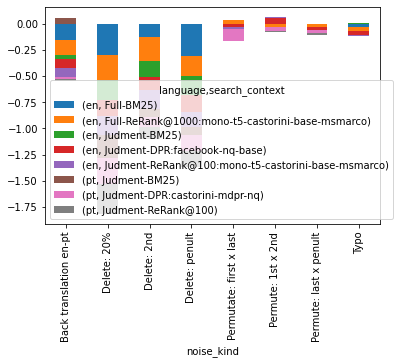

In [69]:
pd.crosstab(df_dg_nDCG10.noise_kind, [df_dg_nDCG10.language, df_dg_nDCG10.search_context], values=df_dg_nDCG10.value, aggfunc='mean').round(3).plot.bar(stacked=True)

In [70]:
orange = sns.light_palette("orange", as_cmap=True)

In [110]:
vlag = sns.color_palette("vlag", as_cmap=True)
diverg = sns.diverging_palette(220, 20, as_cmap=True)

In [71]:
pd.crosstab(df_dg_nDCG10.noise_kind, [df_dg_nDCG10.language, df_dg_nDCG10.search_context], values=df_dg_nDCG10.value, aggfunc='std').round(3).style.background_gradient(cmap=orange)

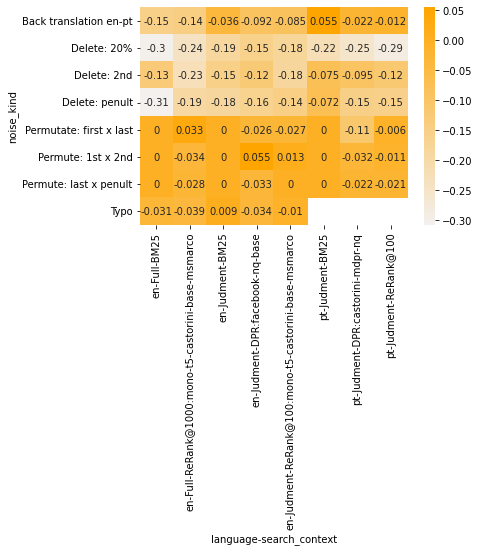

In [72]:
sns.heatmap(pd.crosstab(df_dg_nDCG10.noise_kind, [df_dg_nDCG10.language, df_dg_nDCG10.search_context], values=df_dg_nDCG10.value, aggfunc='mean').round(3),
            cmap=orange, annot=True, cbar=True)

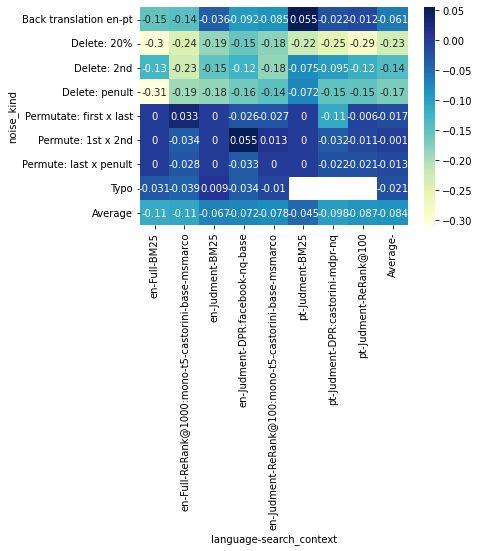

In [73]:
sns.heatmap(pd.crosstab(index=df_dg_nDCG10.noise_kind, columns=[df_dg_nDCG10.language, df_dg_nDCG10.search_context], values=df_dg_nDCG10.value, aggfunc='mean', margins=True, margins_name = 'Average').round(3),
            cmap="YlGnBu", annot=True, cbar=True)

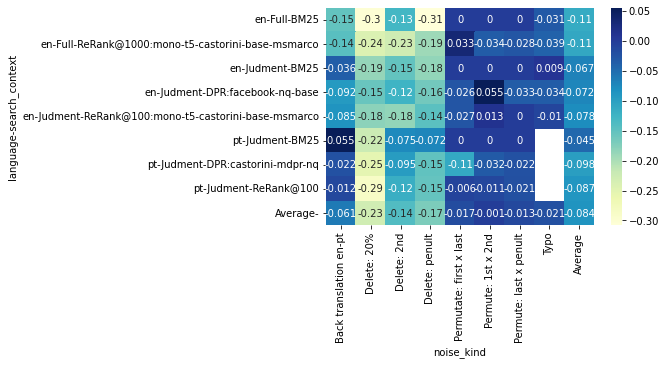

In [74]:
sns.heatmap(pd.crosstab(index=[df_dg_nDCG10.language, df_dg_nDCG10.search_context], columns=df_dg_nDCG10.noise_kind,  values=df_dg_nDCG10.value, aggfunc='mean', margins=True, margins_name = 'Average').round(3),
            cmap="YlGnBu", annot=True, cbar=True)

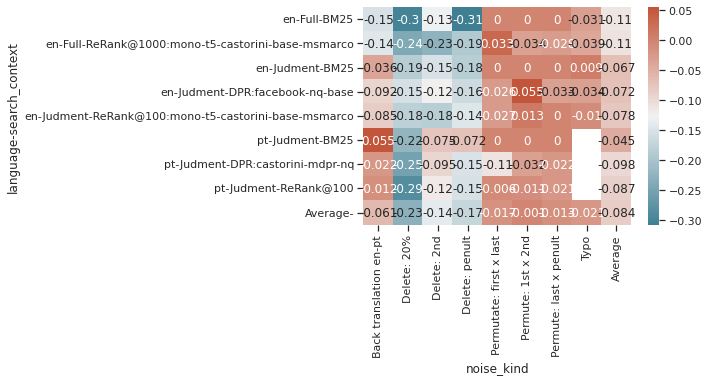

In [111]:
sns.heatmap(pd.crosstab(index=[df_dg_nDCG10.language, df_dg_nDCG10.search_context], columns=df_dg_nDCG10.noise_kind,  values=df_dg_nDCG10.value, aggfunc='mean', margins=True, margins_name = 'Average').round(3),
            cmap=vlag, annot=True, cbar=True)

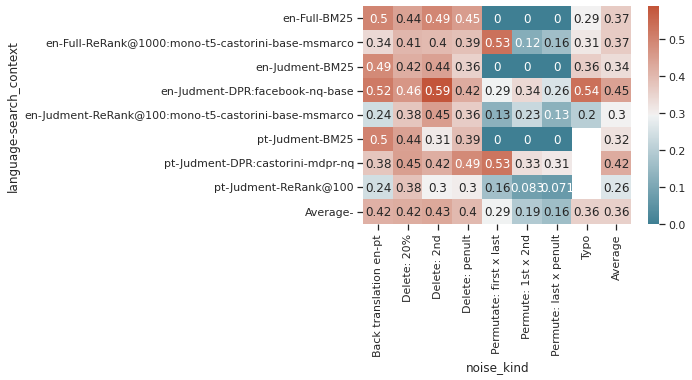

In [112]:
sns.heatmap(pd.crosstab(index=[df_dg_nDCG10.language, df_dg_nDCG10.search_context], columns=df_dg_nDCG10.noise_kind,  values=df_dg_nDCG10.value, aggfunc='std', margins=True, margins_name = 'Average').round(3),
             cmap=vlag, annot=True, cbar=True)

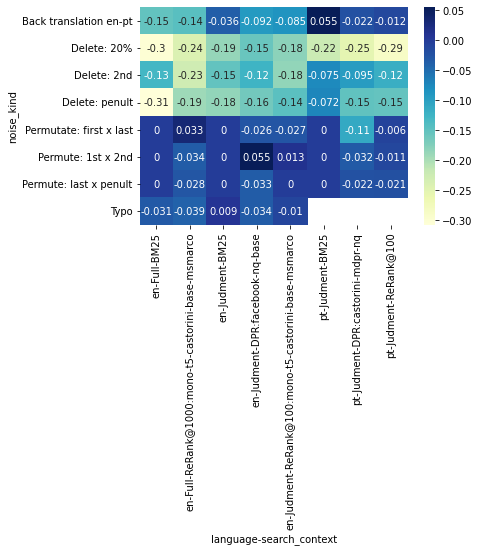

In [75]:
sns.heatmap(pd.crosstab(df_dg_nDCG10.noise_kind, [df_dg_nDCG10.language, df_dg_nDCG10.search_context], values=df_dg_nDCG10.value, aggfunc='mean').round(3),
            cmap="YlGnBu", annot=True, cbar=True)

In [78]:
pd.set_option("display.max_rows", None)
df_dg_nDCG10.groupby(['noise_kind','search_context'],as_index=False).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var'], 
   'qtd_tokens': ['mean', 'count', 'median', 'min', 'max'],  
   })

noise_kind  \
                              
0    Back translation en-pt   
1    Back translation en-pt   
2    Back translation en-pt   
3    Back translation en-pt   
4    Back translation en-pt   
5    Back translation en-pt   
6    Back translation en-pt   
7               Delete: 20%   
8               Delete: 20%   
9               Delete: 20%   
10              Delete: 20%   
11              Delete: 20%   
12              Delete: 20%   
13              Delete: 20%   
14              Delete: 2nd   
15              Delete: 2nd   
16              Delete: 2nd   
17              Delete: 2nd   
18              Delete: 2nd   
19              Delete: 2nd   
20              Delete: 2nd   
21           Delete: penult   
22           Delete: penult   
23           Delete: penult   
24           Delete: penult   
25           Delete: penult   
26           Delete: penult   
27           Delete: penult   
28  Permutate: first x last   
29  Permutate: first x last   
30  Permutate: first x last   
31  Permutate: first x last   
32  Permutate: first x last   
33  Permutate: first x last   
34  Permutate: first x last   
35       Permute: 1st x 2nd   
36       Permute: 1st x 2nd   
37       Permute: 1st x 2nd   
38       Permute: 1st x 2nd   
39       Permute: 1st x 2nd   
40       Permute: 1st x 2nd   
41       Permute: 1st x 2nd   
42   Permute: last x penult   
43   Permute: last x penult   
44   Permute: last x penult   
45   Permute: last x penult   
46   Permute: last x penult   
47   Permute: last x penult   
48   Permute: last x penult   
49                     Typo   
50                     Typo   
51                     Typo   
52                     Typo   
53                     Typo   

                                       search_context     value        \
                                                           mean count   
0                                           Full-BM25 -0.152210    53   
1     Full-ReRank@1000:mono-t5-castorini-base-msmarco -0.143807    54   
2                                        Judment-BM25  0.009117   107   
3                       Judment-DPR:castorini-mdpr-nq -0.022434    52   
4                        Judment-DPR:facebook-nq-base -0.091720    54   
5                                  Judment-ReRank@100 -0.012144    54   
6   Judment-ReRank@100:mono-t5-castorini-base-msmarco -0.085432    53   
7                                           Full-BM25 -0.301007    52   
8     Full-ReRank@1000:mono-t5-castorini-base-msmarco -0.240406    54   
9                                        Judment-BM25 -0.204875   103   
10                      Judment-DPR:castorini-mdpr-nq -0.251946    53   
11                       Judment-DPR:facebook-nq-base -0.155110    53   
12                                 Judment-ReRank@100 -0.286436    54   
13  Judment-ReRank@100:mono-t5-castorini-base-msmarco -0.179933    54   
14                                          Full-BM25 -0.128180    52   
15    Full-ReRank@1000:mono-t5-castorini-base-msmarco -0.225937    54   
16                                       Judment-BM25 -0.113302   104   
17                      Judment-DPR:castorini-mdpr-nq -0.095224    54   
18                       Judment-DPR:facebook-nq-base -0.124163    53   
19                                 Judment-ReRank@100 -0.117457    54   
20  Judment-ReRank@100:mono-t5-castorini-base-msmarco -0.184286    54   
21                                          Full-BM25 -0.308150    52   
22    Full-ReRank@1000:mono-t5-castorini-base-msmarco -0.191252    53   
23                                       Judment-BM25 -0.126726   103   
24                      Judment-DPR:castorini-mdpr-nq -0.150367    51   
25                       Judment-DPR:facebook-nq-base -0.162071    53   
26                                 Judment-ReRank@100 -0.152537    54   
27  Judment-ReRank@100:mono-t5-castorini-base-msmarco -0.144751    54   
28                                          Full-BM25  0.000000    54   
29    Full-ReRank

Original queries

In [79]:
df_original_query_with_ndcg.groupby(['search_context']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max'],    
   'qtd_tokens': ['mean', 'count', 'median', 'min', 'max'],
   })

value                  \
                                                        mean count    median   
search_context                                                                 
Full-BM25                                           0.433924    54  0.400750   
Full-ReRank@1000:mono-t5-castorini-base-msmarco     0.669499    54  0.695759   
Judment-BM25                                        0.391022   108  0.368681   
Judment-DPR:castorini-mdpr-nq                       0.332598    54  0.307228   
Judment-DPR:facebook-nq-base                        0.504109    54  0.505919   
Judment-ReRank@100:mono-mt5-unicamp-base-en-pt-...  0.619440    54  0.669926   
Judment-ReRank@100:mono-mt5-unicamp-base-multi-...  0.608901    54  0.656264   
Judment-ReRank@100:mono-ptt5-unicamp-base-pt-ms...  0.601677    54  0.636155   
Judment-ReRank@100:mono-t5-castorini-base-msmarco   0.661600    54  0.695141   

                                                                        \
                                                         min       max   
search_context                                                           
Full-BM25                                           0.000000  0.977854   
Full-ReRank@1000:mono-t5-castorini-base-msmarco     0.050171  1.000000   
Judment-BM25                                        0.000000  0.950091   
Judment-DPR:castorini-mdpr-nq                       0.000000  1.000000   
Judment-DPR:facebook-nq-base                        0.000000  1.000000   
Judment-ReRank@100:mono-mt5-unicamp-base-en-pt-...  0.000000  1.000000   
Judment-ReRank@100:mono-mt5-unicamp-base-multi-...  0.000000  1.000000   
Judment-ReRank@100:mono-ptt5-unicamp-base-pt-ms...  0.000000  1.000000   
Judment-ReRank@100:mono-t5-castorini-base-msmarco   0.000000  1.000000   

                                                   qtd_tokens               \
                                                         mean count median   
search_context                                                               
Full-BM25                                            6.185185    54      6   
Full-ReRank@1000:mono-t5-castorini-base-msmarco      6.185185    54      6   
Judment-BM25                                         6.462963   108      6   
Judment-DPR:castorini-mdpr-nq                        6.740741    54      6   
Judment-DPR:facebook-nq-base                         6.185185    54      6   
Judment-ReRank@100:mono-mt5-unicamp-base-en-pt-...   6.740741    54      6   
Judment-ReRank@100:mono-mt5-unicamp-base-multi-...   6.740741    54      6   
Judment-ReRank@100:mono-ptt5-unicamp-base-pt-ms...   6.740741    54      6   
Judment-ReRank@100:mono-t5-castorini-base-msmarco    6.185185    54      6   

                                                            
                                                   min max  
search_context                                              
Full-BM25                                            2  16  
Full-ReRank@1000:mono-t5-castorini-base-msmarco      2  16  
Judment-BM25                                         2  16  
Judment-DPR:castorini-mdpr-nq                        2  15  
Judment-DPR:facebook-nq-base                         2  16  
Judment-ReRank@100:mono-mt5-unicamp-base-en-pt-...   2  15  
Judment-ReRank@100:mono-mt5-unicamp-base-multi-...   2  15  
Judment-ReRank@100:mono-ptt5-unicamp-base-pt-ms...   2  15  
Judment-ReRank@100:mono-t5-castorini-base-msmarco    2  16

In [40]:
pd.set_option( "display.max_rows", 15)

## Exploring nDCG@10

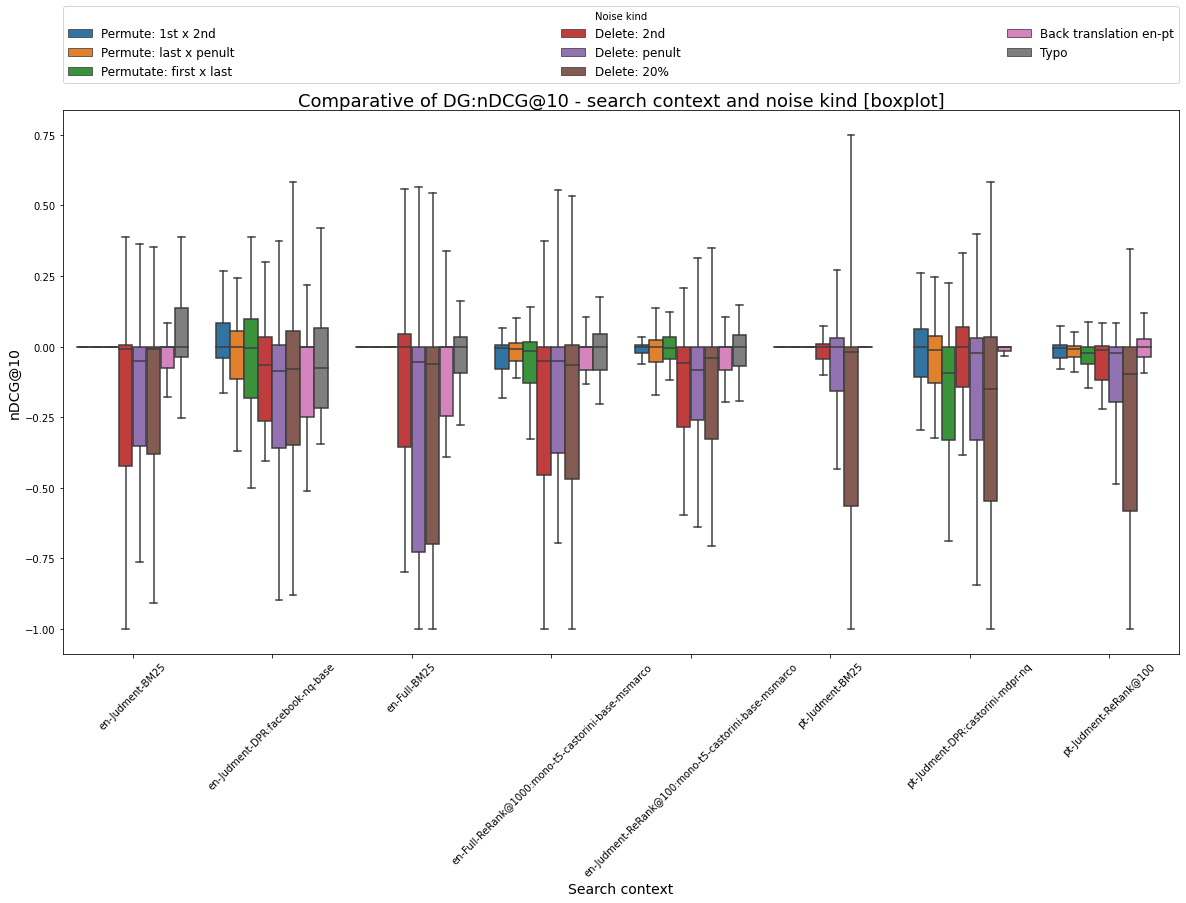

In [88]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x='language_search_context', hue="noise_kind", y="value", ax=ax,  data=df_dg_nDCG10, showfliers = False)
plt.xlabel('Search context', fontsize=14)
plt.ylabel('nDCG@10', fontsize=14)
plt.xticks(rotation=45)
ax.set_title('Comparative of DG:nDCG@10 - search context and noise kind [boxplot]', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Noise kind') 
plt.show()

## Exploring DG:nDCG@10

## Structure change: query x noisy

In [89]:
list_noise_kind_descr = list(df_dg_nDCG10['noise_kind'].unique())
list_noise_kind_descr

['Permute: 1st x 2nd',
 'Permute: last x penult',
 'Permutate: first x last',
 'Delete: 2nd',
 'Delete: penult',
 'Delete: 20%',
 'Back translation en-pt',
 'Typo']

In [90]:
list_search_context = list(df_dg_nDCG10['search_context'].unique())
list_search_context

['Judment-BM25',
 'Judment-DPR:facebook-nq-base',
 'Full-BM25',
 'Full-ReRank@1000:mono-t5-castorini-base-msmarco',
 'Judment-ReRank@100:mono-t5-castorini-base-msmarco',
 'Judment-DPR:castorini-mdpr-nq',
 'Judment-ReRank@100']

In [91]:
import pandas as pd

desconto_ganho = {}
for row in df_dg_nDCG10.itertuples():
    if row.cod_original_query not in desconto_ganho:
        desconto_ganho[row.cod_original_query] = {}
    desconto_ganho[row.cod_original_query][(row.search_context, row.noise_kind)] = row.value
df_desconto_ganho = pd.DataFrame.from_dict(desconto_ganho, orient='index')
df_desconto_ganho.index.name = 'cod_original_query'
df_desconto_ganho.head()

Judment-BM25 Judment-DPR:facebook-nq-base  \
                   Permute: 1st x 2nd           Permute: 1st x 2nd   
cod_original_query                                                   
23849                             0.0                    -0.090789   
42255                             0.0                     0.067815   
47210                             0.0                    -0.117061   
67316                             0.0                     0.267232   
118440                            0.0                    -0.029245   

                            Full-BM25  \
                   Permute: 1st x 2nd   
cod_original_query                      
23849                             0.0   
42255                             0.0   
47210                             0.0   
67316                             0.0   
118440                            0.0   

                   Full-ReRank@1000:mono-t5-castorini-base-msmarco  \
                                                Permute: 1st x 2nd   
cod_original_query                                                   
23849                                                    -0.180263   
42255                                                     0.000000   
47210                                                     0.000000   
67316                                                     0.016642   
118440                                                   -0.263434   

                   Judment-ReRank@100:mono-t5-castorini-base-msmarco  \
                                                  Permute: 1st x 2nd   
cod_original_query                                                     
23849                                                      -0.137691   
42255                                                       0.000000   
47210                                                      -0.004476   
67316                                                       0.000000   
118440                                                      0.000000   

                             Judment-BM25 Judment-DPR:facebook-nq-base  \
                   Permute: last x penult       Permute: last x penult   
cod_original_query                                                       
23849                                 0.0                    -0.069415   
42255                                 0.0                     0.067815   
47210                                 0.0                    -0.224849   
67316                                 0.0                    -0.366214   
118440                                0.0                     0.000000   

                                Full-BM25  \
                   Permute: last x penult   
cod_original_query                          
23849                                 0.0   
42255                                 0.0   
47210                                 0.0   
67316                                 0.0   
118440                                0.0   

                   Full-ReRank@1000:mono-t5-castorini-base-msmarco  \
                                            Permute: last x penult   
cod_original_query                                                   
23849                                                    -0.182241   
42255                                                     0.000000   
47210                                                    -0.043188   
67316                                                     0.000000   
118440                                                    0.228609   

                   Judment-ReRank@100:mono-t5-castorini-base-msmarco  \
                                              Permute: last x penult   
cod_original_query                                                     
23849                                                      -0.168815   
42255                                                       0.000000   
47210                                                      -0.004476   
67316                                             

## Exploring Mean

In [92]:
df_desconto_ganho_medio = df_desconto_ganho.mean().unstack().T
#df_desconto_ganho_medio = df_desconto_ganho_medio.reindex(list_search_context, axis=1)
#df_desconto_ganho_medio = df_desconto_ganho_medio.reindex(list_noise_kind_descr, axis=0)
df_desconto_ganho_medio

,Full-BM25,Full-ReRank@1000:mono-t5-castorini-base-msmarco,Judment-BM25,Judment-DPR:castorini-mdpr-nq,Judment-DPR:facebook-nq-base,Judment-ReRank@100,Judment-ReRank@100:mono-t5-castorini-base-msmarco
Back translation en-pt,-0.152210,-0.143807,0.058720,-0.022434,-0.091720,-0.012144,-0.085432
Delete: 20%,-0.301007,-0.240406,-0.222076,-0.251946,-0.155110,-0.286436,-0.179933
Delete: 2nd,-0.128180,-0.225937,-0.076459,-0.095224,-0.124163,-0.117457,-0.184286
Delete: penult,-0.308150,-0.191252,-0.072343,-0.150367,-0.162071,-0.152537,-0.144751
Permutate: first x last,0.000000,0.032533,0.000000,-0.109816,-0.025640,-0.006357,-0.026913
Permute: 1st x 2nd,0.000000,-0.033821,0.000000,-0.031793,0.055281,-0.011411,0.012571
Permute: last x penult,0.000000,-0.028313,0.000000,-0.021965,-0.032515,-0.020950,0.000004
Typo,-0.030610,-0.038538,0.008669,NaN,-0.033583,NaN,-0.009826


In [48]:
#(df_desconto_ganho_medio+1).T.plot.bar(rot=90, figsize=(20,10), title='Mean dicount or gain for each noise kind and search context', ylabel='DG:nDCG@10 médio + 1', ylim=(0,+1.5))
#plt.show()

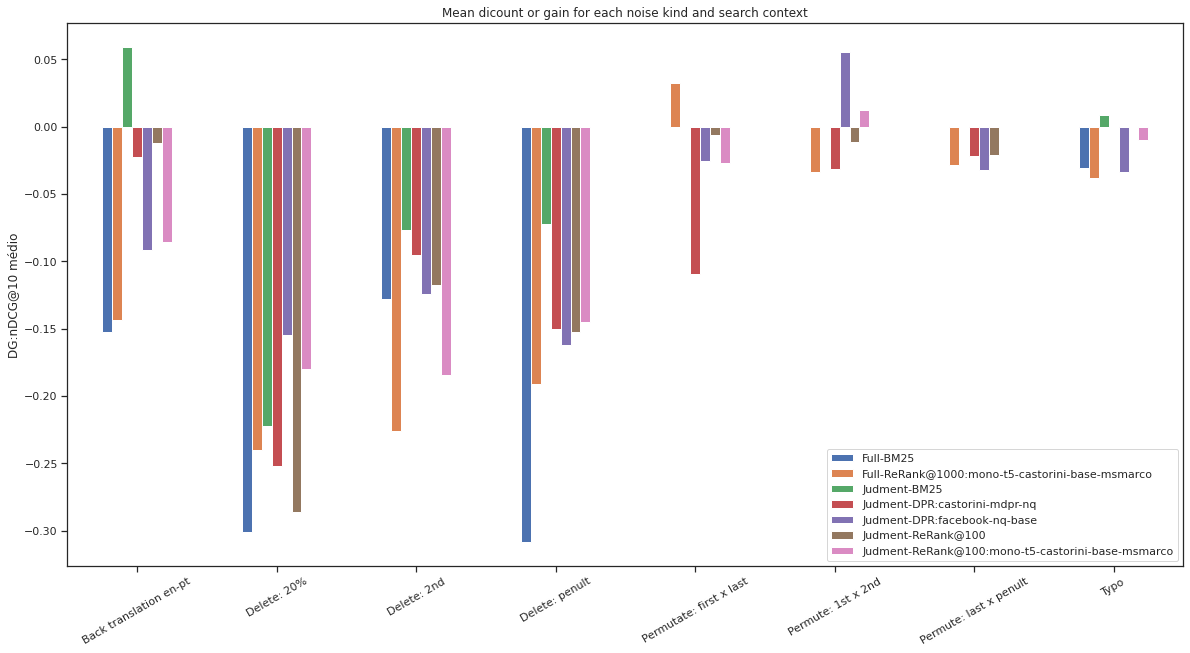

In [113]:
df_desconto_ganho_medio.plot.bar(rot=30, figsize=(20,10), title='Mean dicount or gain for each noise kind and search context', ylabel='DG:nDCG@10 médio')
plt.show()

## Distributions

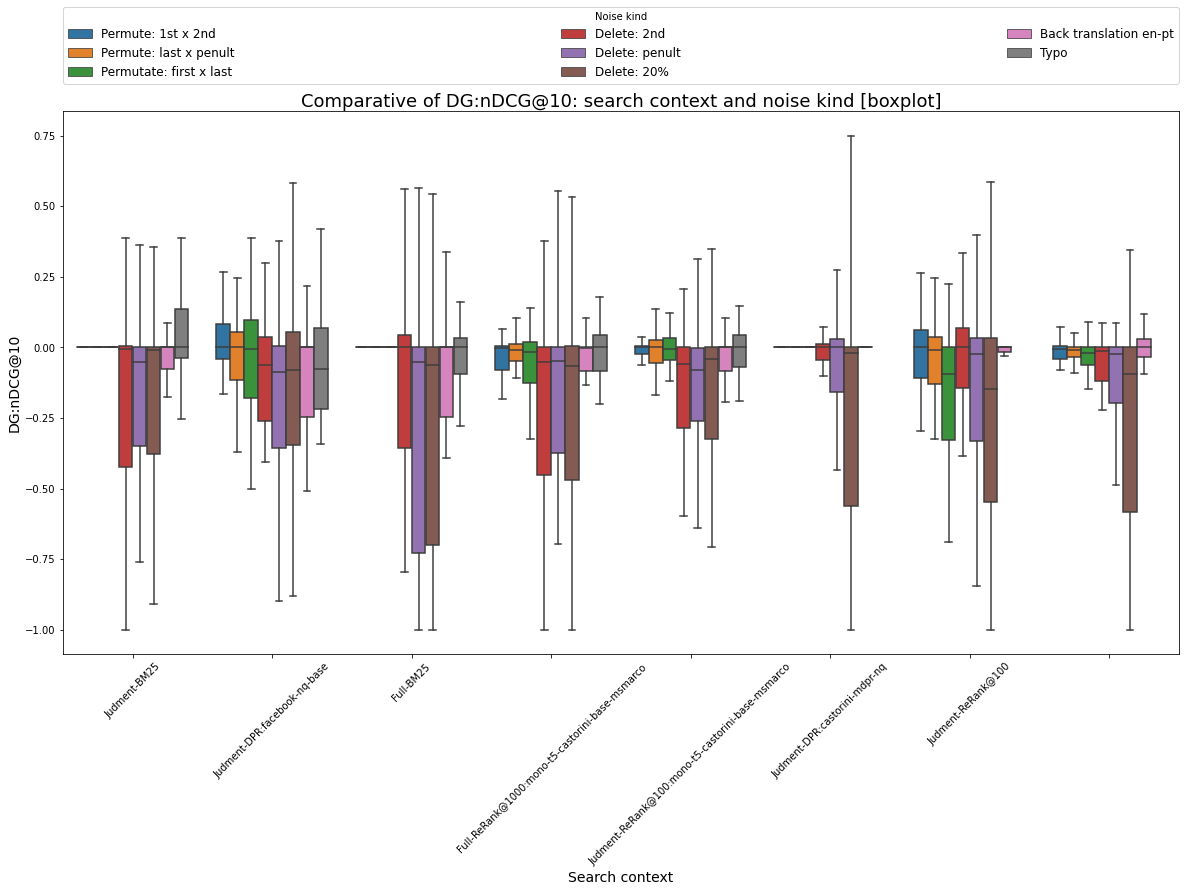

In [95]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="language_search_context", hue="noise_kind", y="value", ax=ax,  data=df_dg_nDCG10, showfliers = False)
plt.xlabel('Search context', fontsize=14)
ax.set_xticklabels(list_search_context,rotation=45)
plt.ylabel('DG:nDCG@10', fontsize=14)
ax.set_title('Comparative of DG:nDCG@10: search context and noise kind [boxplot]', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Noise kind') 
plt.show()

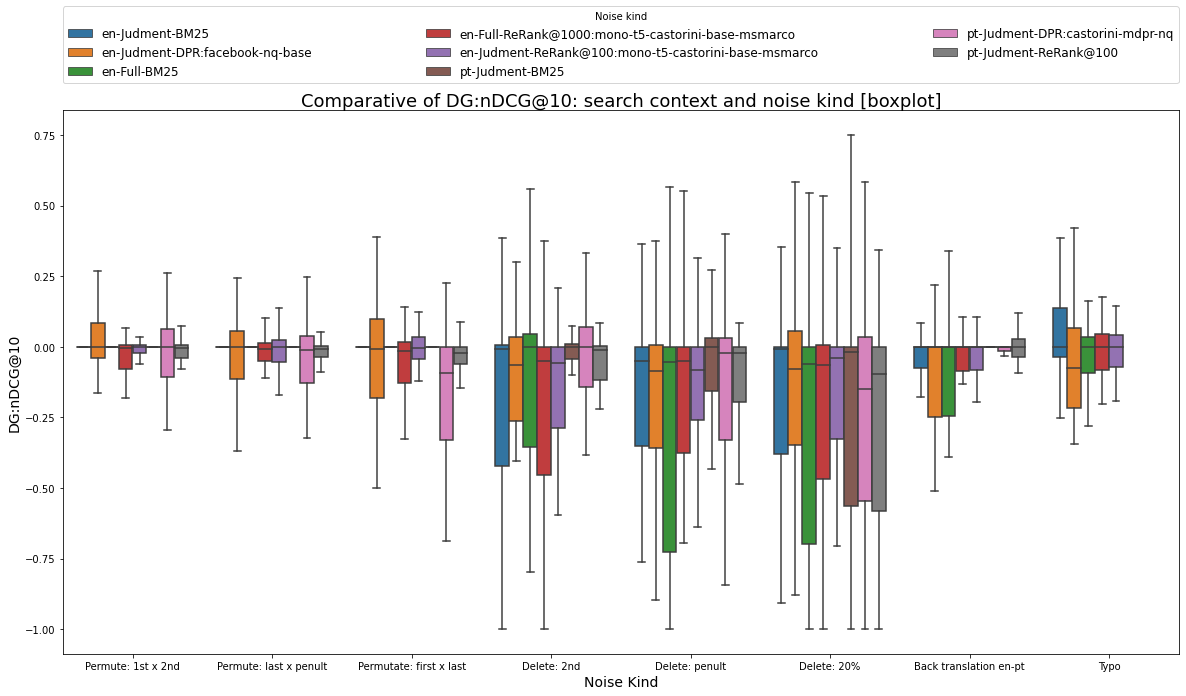

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="noise_kind", hue="language_search_context", y="value", ax=ax, data=df_dg_nDCG10, showfliers = False)
plt.xlabel('Noise Kind', fontsize=14)
plt.ylabel('DG:nDCG@10', fontsize=14)
ax.set_title('Comparative of DG:nDCG@10: search context and noise kind [boxplot]', y=1.0, pad=-14, fontsize=18)
plt.legend(bbox_to_anchor=(0., 1.05, 1., 1.02), loc=3, ncol=3,  borderaxespad=0., mode="expand", fontsize=12, title = 'Noise kind') 
plt.show()

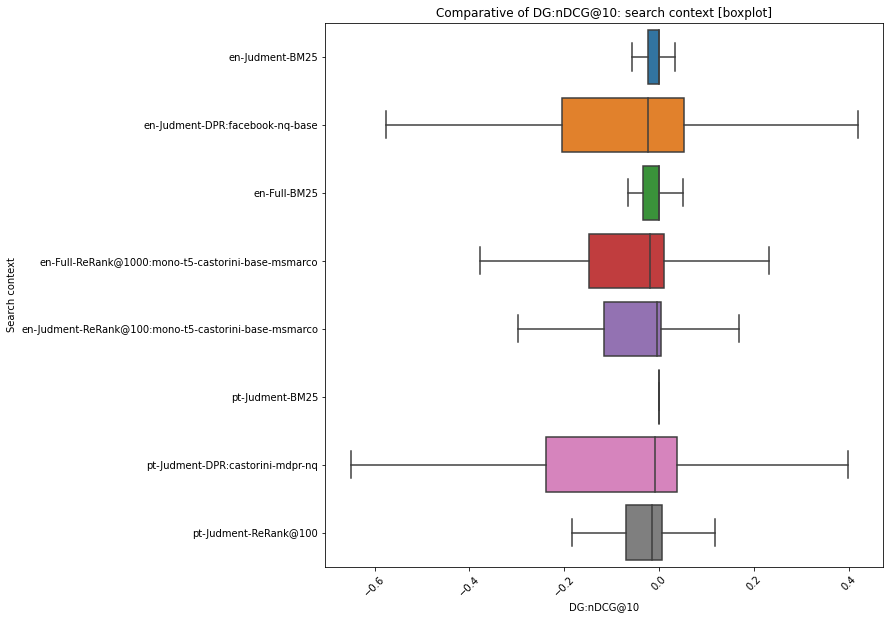

In [100]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(y="language_search_context", x="value", ax=ax, data=df_dg_nDCG10, showfliers = False)
ax.set(ylabel = 'Search context', xlabel = 'DG:nDCG@10')
#ax.set(xlim=(-1, 2))
plt.xticks(rotation=45)
ax.set_title('Comparative of DG:nDCG@10: search context [boxplot]')
fig.savefig('graphics\comparative_search_context_boxplot', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

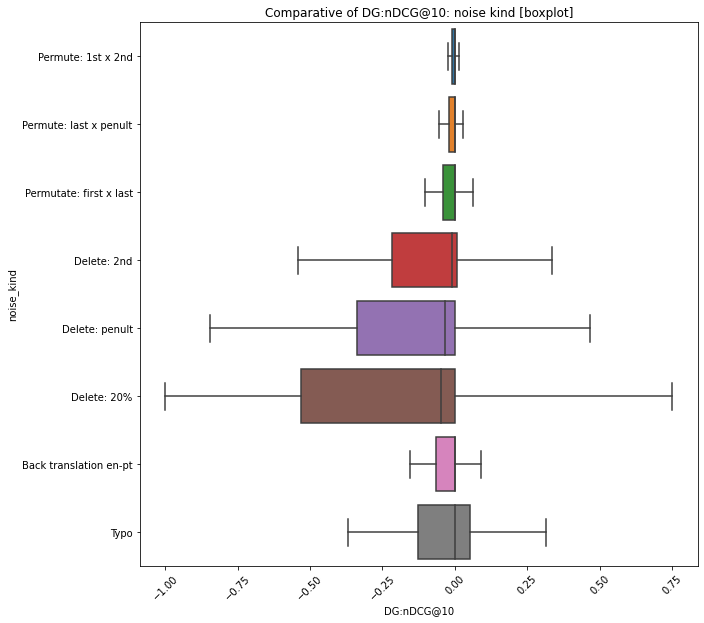

In [103]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(y="noise_kind", x="value", ax=ax, data=df_dg_nDCG10, showfliers = False)
ax.set(ylabel = 'noise_kind', xlabel = 'DG:nDCG@10')
#ax.set(xlim=(-1, 2))
plt.xticks(rotation=45)
ax.set_title('Comparative of DG:nDCG@10: noise kind [boxplot]')
fig.savefig('graphics\comparative_noise_kind_boxplot', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

## Correlations

In [53]:
df_dg_nDCG10['value'].corr(df_dg_nDCG10['qtd_tokens'])

0.09266332047017413

In [54]:
noise='No changes'

In [55]:
df_dg_nDCG10.query("noise_kind == '" + noise + "'" )

,date_time_execution,cod_metric,cod_original_query,cod_noise_kind,cod_search_context,value,qtd_judment_assumed,language,noise_kind,search_engine,search_context,text,qtd_tokens,qtd_tokens_passing,qtd_tokens_missing
2,2021-12-03 21:01:52,DG:nDCG@10,23849,0,6,0.0,0,pt,No changes,Elastic,BM25,são informações públicas de registros de natur...,7,0,0
5,2021-12-03 21:01:52,DG:nDCG@10,23849,0,7,0.0,0,pt,No changes,Elastic,DPR:castorini-mdpr-nq,são informações públicas de registros de natur...,7,0,0
8,2021-12-03 21:01:52,DG:nDCG@10,23849,0,8,0.0,0,pt,No changes,Elastic,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,são informações públicas de registros de natur...,7,0,0
11,2021-12-03 21:01:52,DG:nDCG@10,23849,0,9,0.0,0,pt,No changes,Elastic,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,são informações públicas de registros de natur...,7,0,0
20,2021-12-06 08:09:13,DG:nDCG@10,23849,0,12,0.0,0,pt,No changes,Elastic,ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k,são informações públicas de registros de natur...,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,2021-12-03 21:01:52,DG:nDCG@10,1136962,0,6,0.0,0,pt,No changes,Elastic,BM25,por que os antigos egípcios chamavam sua terra...,14,0,1
1436,2021-12-03 21:01:52,DG:nDCG@10,1136962,0,7,0.0,0,pt,No changes,Elastic,DPR:castorini-mdpr-nq,por que os antigos egípcios chamavam sua terra...,14,0,1
1439,2021-12-03 21:01:52,DG:nDCG@10,1136962,0,8,0.0,0,pt,No changes,Elastic,ReRank@100:mono-mt5-unicamp-base-multi-msmarco,por que os antigos egípcios chamavam sua terra...,14,0,1
1442,2021-12-03 21:01:52,DG:nDCG@10,1136962,0,9,0.0,0,pt,No changes,Elastic,ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco,por que os antigos egípcios chamavam sua terra...,14,0,1


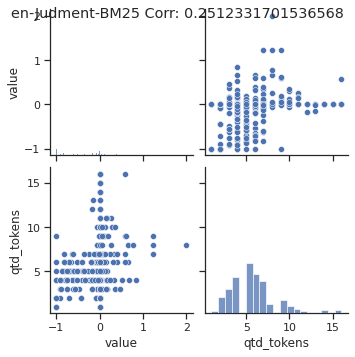

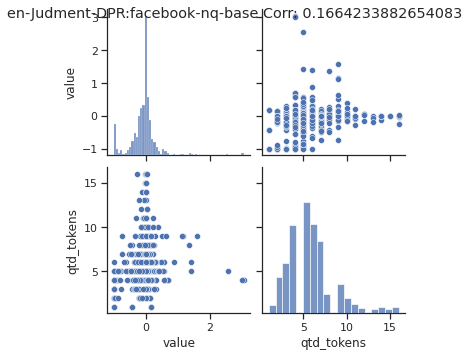

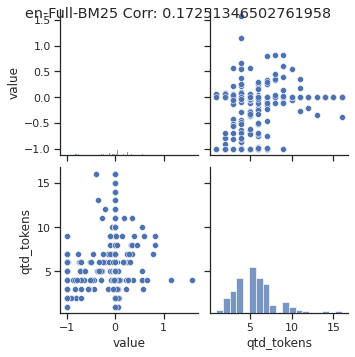

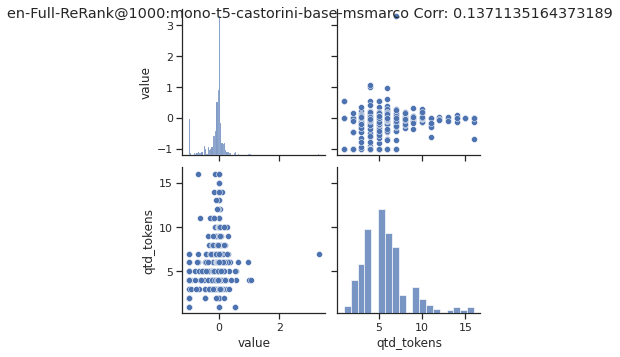

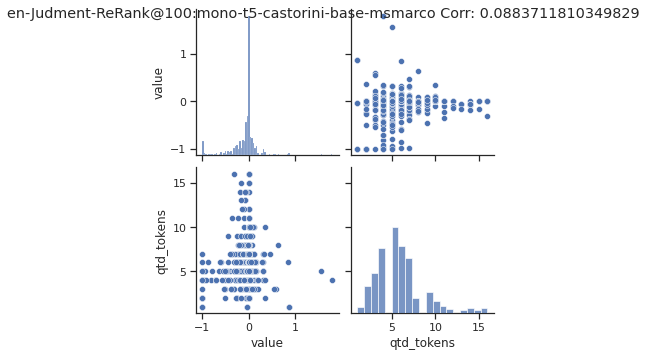

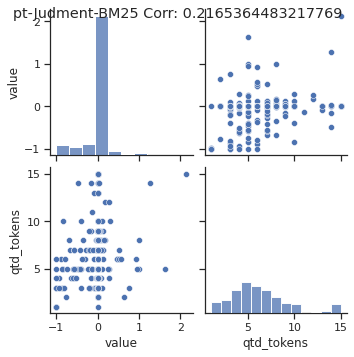

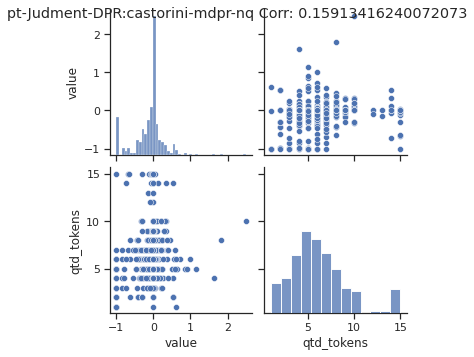

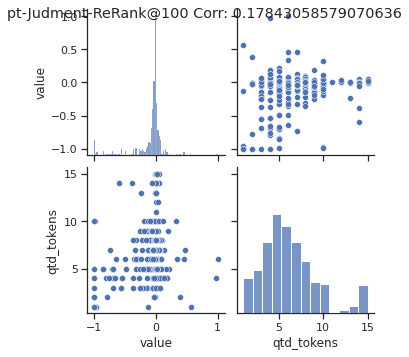

In [106]:
sns.set(style="ticks", color_codes=True)  
for language_search_context in df_dg_nDCG10['language_search_context'].unique():
  df = df_dg_nDCG10.query("language_search_context == '" + language_search_context + "'" )[['value', 'qtd_tokens']]
  title = language_search_context + " Corr: " + str(df['value'].corr(df['qtd_tokens']))
  # print("      covariance", df['value'].cov(df['qtd_tokens']))
  ax = sns.pairplot(df)
  ax.fig.suptitle(title)
  

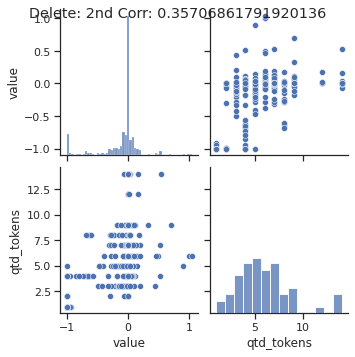

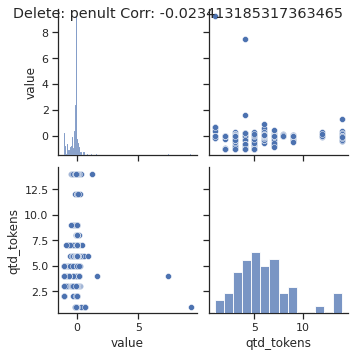

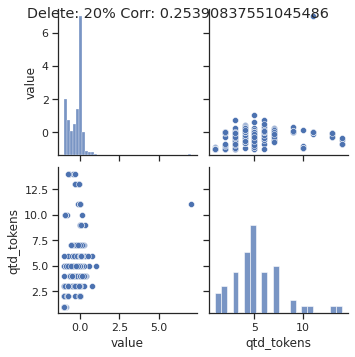

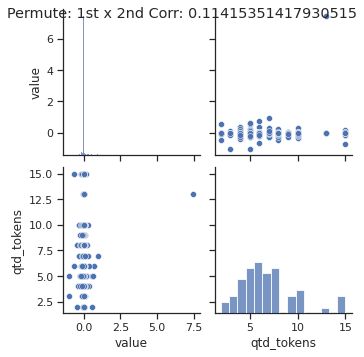

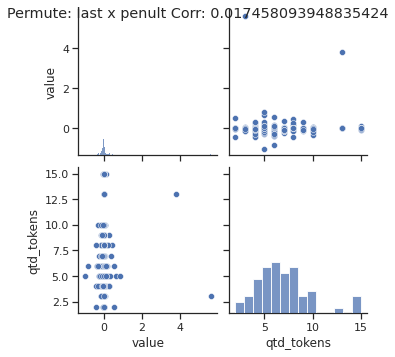

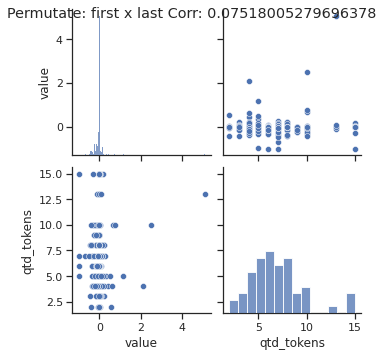

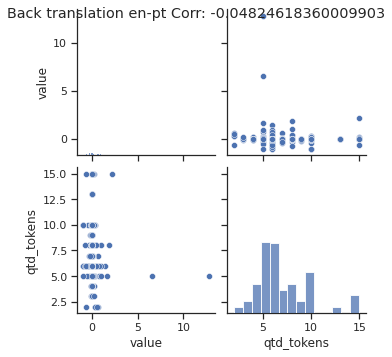

In [57]:
sns.set(style="ticks", color_codes=True)  
for noise in ['Delete: 2nd', 'Delete: penult', 'Delete: 20%',
       'Permute: 1st x 2nd', 'Permute: last x penult',
       'Permutate: first x last', 'Back translation en-pt']:
  df = df_dg_nDCG10.query("noise_kind == '" + noise + "'" )[['value', 'qtd_tokens']]
  title = noise + " Corr: " + str(df['value'].corr(df['qtd_tokens']))
  # print("      covariance", df['value'].cov(df['qtd_tokens']))
  ax = sns.pairplot(df)
  ax.fig.suptitle(title)
  
  
  


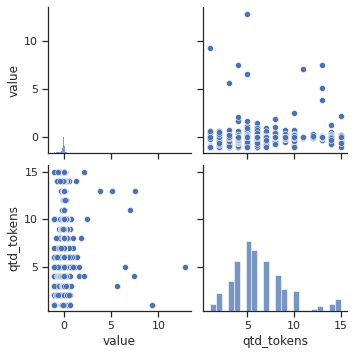

In [58]:
 ax = sns.pairplot(df_dg_nDCG10.query("cod_noise_kind != 0")[['value', 'qtd_tokens']])

In [59]:
df_dg_nDCG10.query("noise_kind == '" + noise + "'" )[['value', 'qtd_tokens','qtd_tokens_missing']].corr()


,value,qtd_tokens,qtd_tokens_missing
value,1.000000,-0.048246,0.027628
qtd_tokens,-0.048246,1.000000,0.104129
qtd_tokens_missing,0.027628,0.104129,1.000000


## Queries Comparative

In [60]:
df_original_query  = util_bd_pandas.read_df_original_query_and_dict_val_idg()[0].query('language == "pt"')[['cod', 'text']].set_index('cod')
df_original_query.index

Int64Index([  23849,   42255,   47210,   67316,  118440,  121171,  135802,
             141630,  156498,  169208,  174463,  258062,  324585,  330975,
             332593,  336901,  390360,  405163,  555530,  583468,  640502,
             673670,  701453,  730539,  768208,  877809,  911232,  914916,
             938400,  940547,  997622, 1030303, 1037496, 1043135, 1051399,
            1064670, 1071750, 1105792, 1106979, 1108651, 1109707, 1110678,
            1113256, 1115210, 1116380, 1121353, 1122767, 1127540, 1131069,
            1132532, 1133579, 1136043, 1136047, 1136962],
           dtype='int64', name='cod')

In [69]:
pd.set_option("display.max_rows", 15)

In [70]:
def build_graph(noise, short):
  df1 = df_dg_nDCG10.query('noise_kind == "' + noise + '"')[['cod_original_query', 'search_context', 'value']].set_index('cod_original_query')
  df2 = pd.DataFrame(index=df_original_query.index)
  search_contexts = list(df1.search_context.unique())
  for search_context in search_contexts:
      df2[search_context] = df1.query('search_context == "' + search_context + '"')['value']
  df2['Text'] = df_original_query['text']
  df2['sort'] = abs(df2[search_contexts[0]]) + abs(df2[search_contexts[1]]) + abs(df2[search_contexts[2]]) 
  df2 = df2.dropna()
  df2 = df2.sort_values('sort', ascending=False)

  fig = plt.figure(figsize=(10, 20))
  ax = fig.subplots()
  data = df2.to_dict(orient='index')


  Y = np.zeros(10)
  yticklabels = []

  def plot_query(x, y, linestyle, dotstyle, color, label):
          if y:
              label = None
          if x > 1: x = 1
          ax.plot(np.linspace(0, x, 10), Y+i, linestyle=linestyle, linewidth=1.5, color=color)
          ax.plot(x, y, dotstyle, label=label)
          
  formato = ['solid', 'dashed', 'dotted' ]
  cores =   ['blue', 'green', 'red']
  marcas =  ['bo', 'gs', 'rd']

  for i, query in enumerate(data.keys()):
    valores = np.array([data[query][search_contexts[0]]
                        ,data[query][search_contexts[1]]
                        ,data[query][search_contexts[2]]
                        ])

    #print(valores)
    ordem = (-valores).argsort()

    for pos in range(len(ordem)):
      prox_pos = ordem[pos]
      plot_query(data[query][search_contexts[prox_pos]], i, formato[prox_pos], marcas[prox_pos], cores[prox_pos], search_contexts[prox_pos].split('_')[0])

    yticklabels.append(data[query]['Text'])

  legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
  ax.set_title("Noise: " + noise)
  ax.set(ylim=(-1, len(data)+4.5),
          yticks=np.arange(len(data)), 
          xticks=np.arange(-1.0, 1.10, .05),
          yticklabels=yticklabels)
  ax.set_xlabel('DG:nDCG@10')
  ax.tick_params(left=False, bottom=True, labelbottom=True)
  fig.savefig('dg_ndcg10_' + short + '.png', transparent=False, dpi=80, bbox_inches='tight')

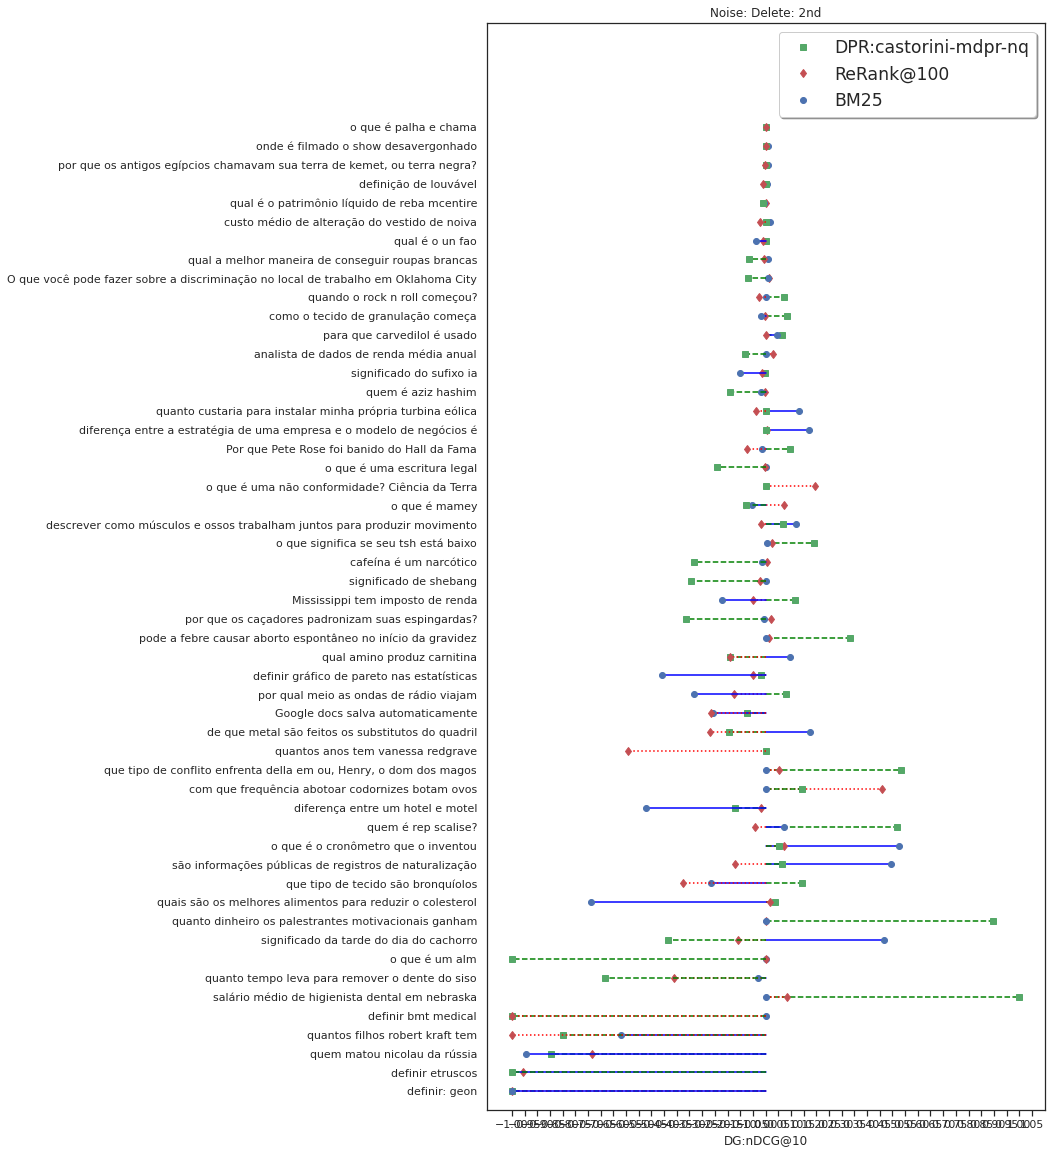

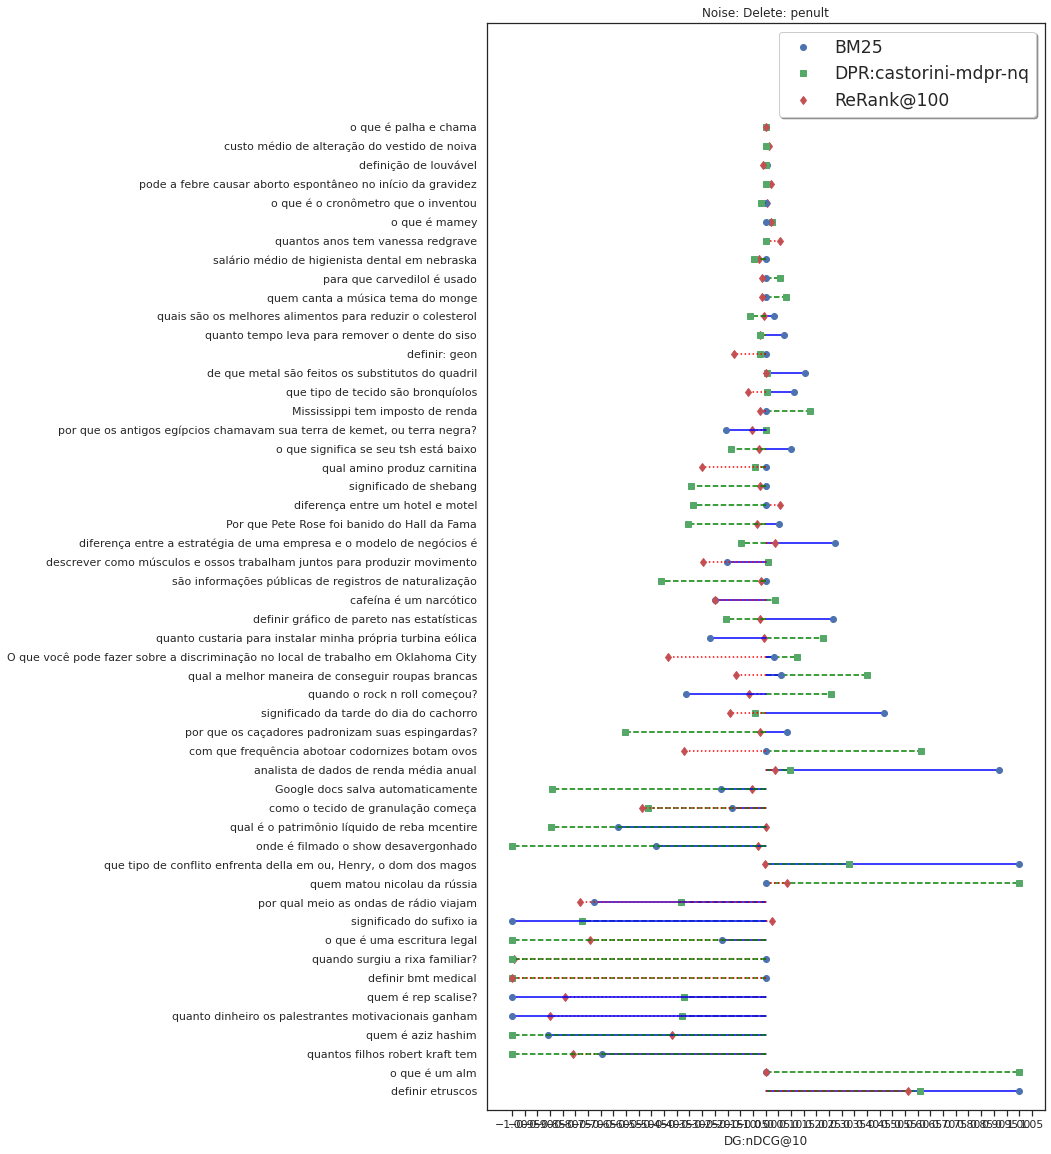

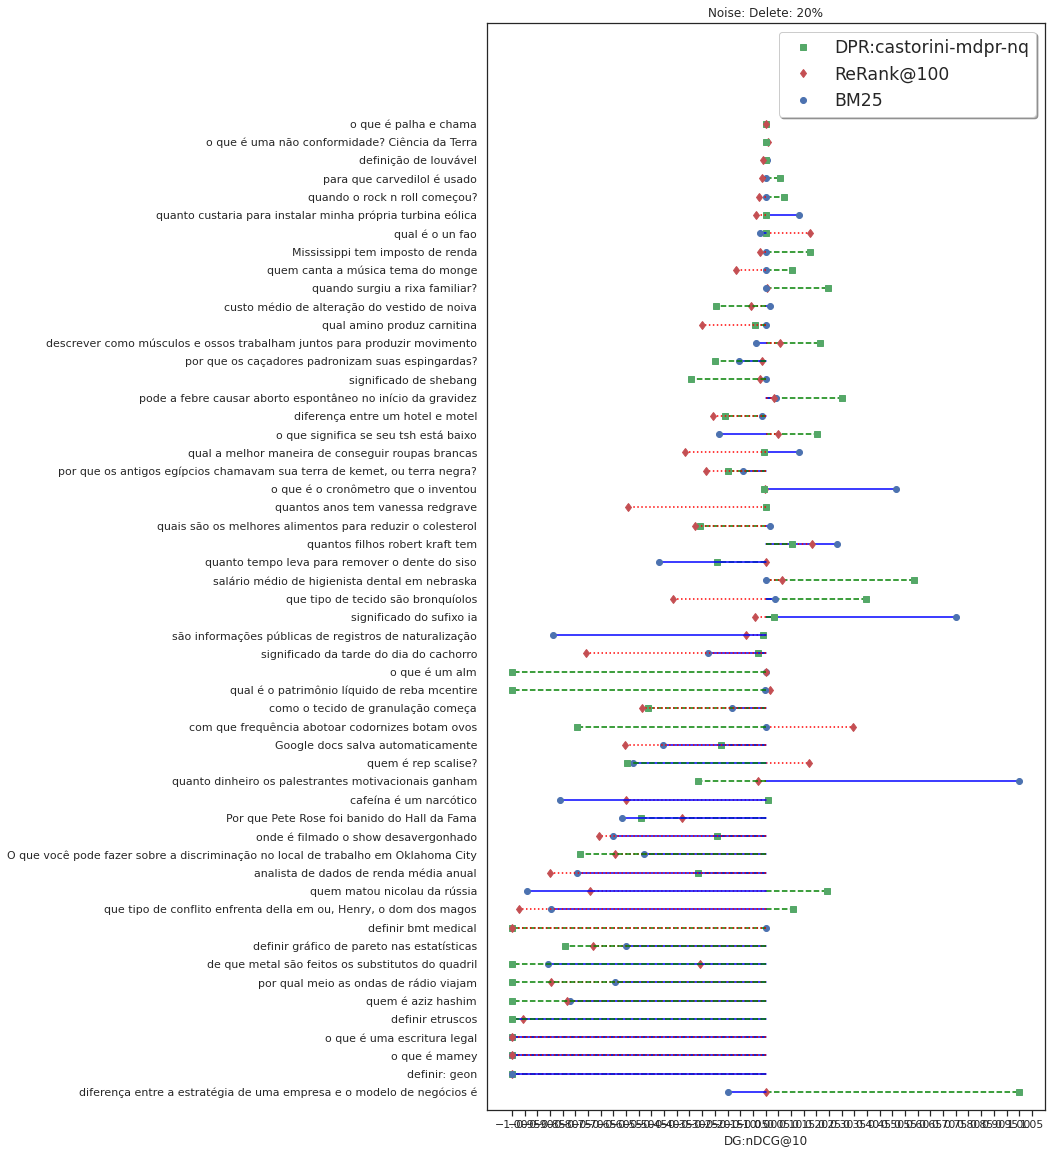

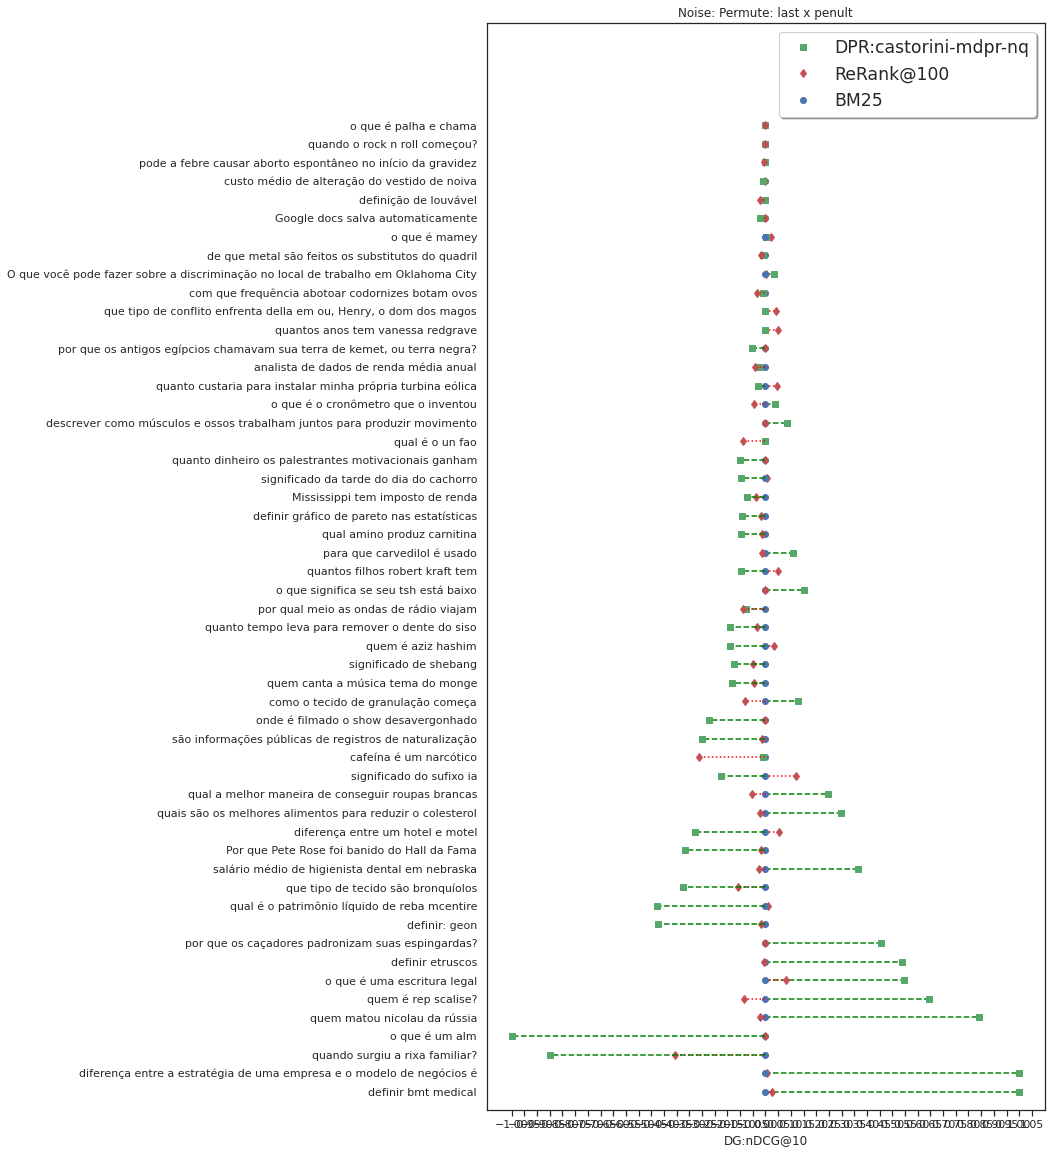

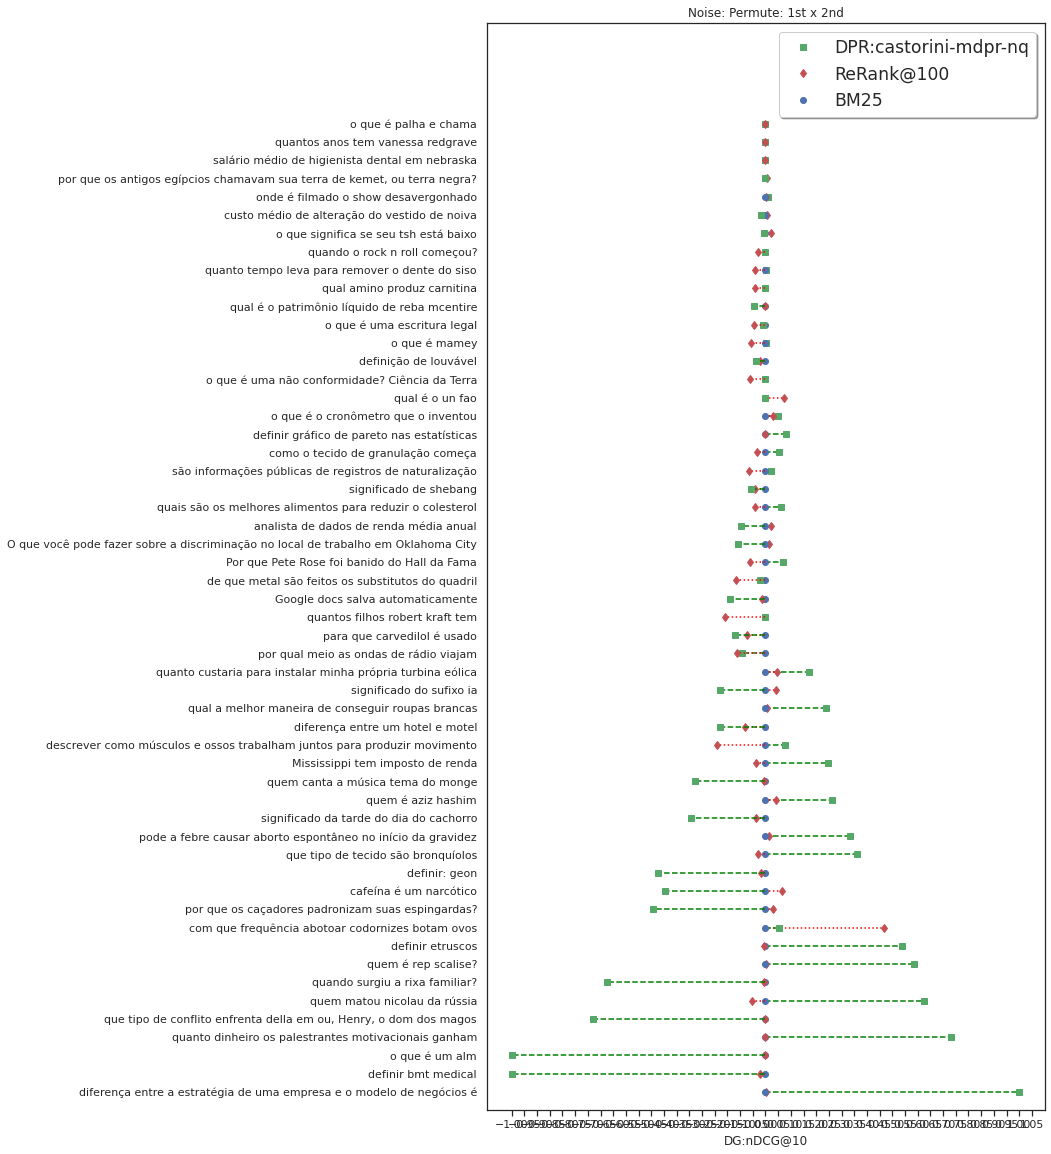

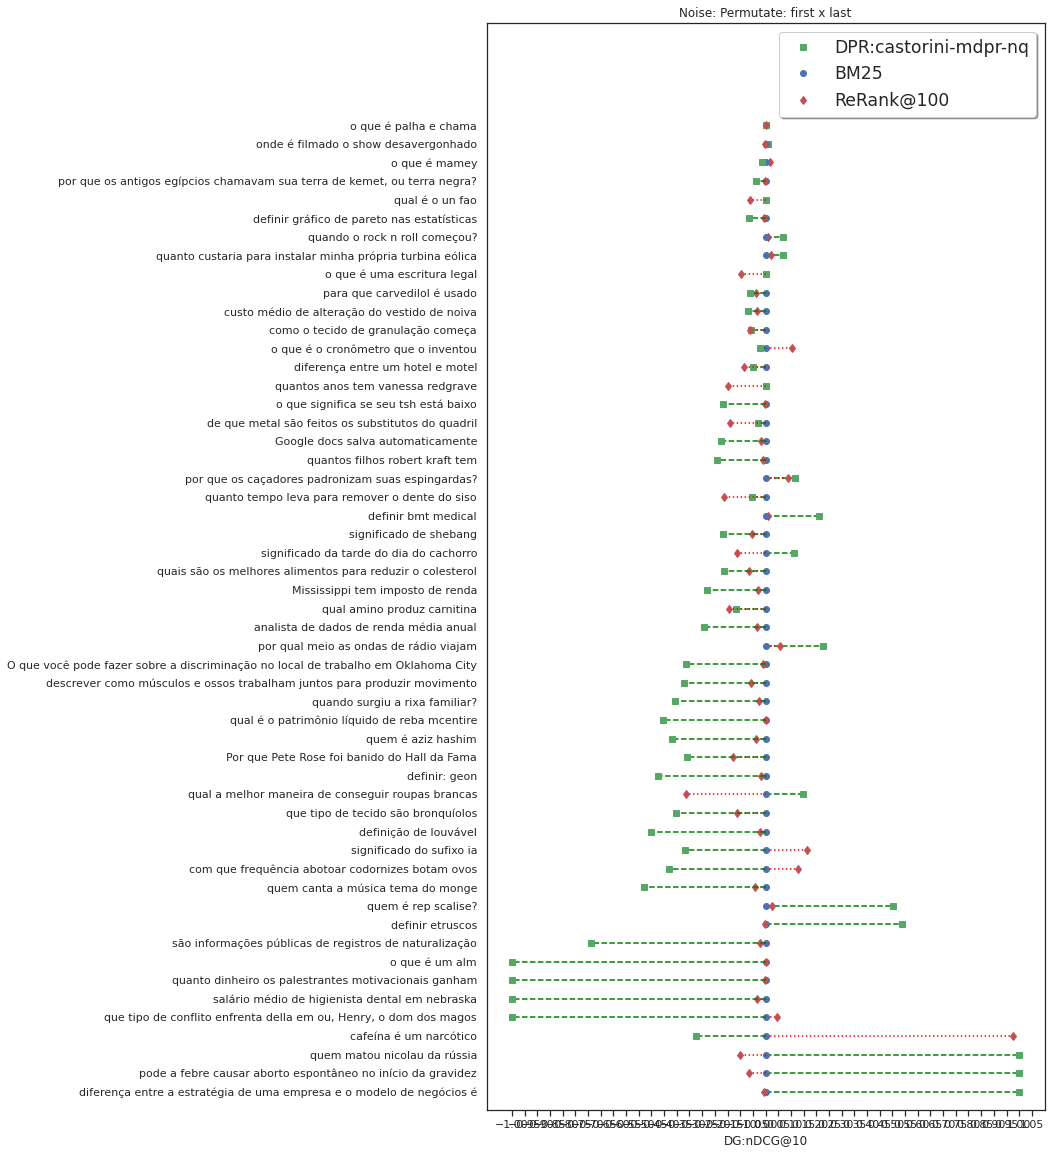

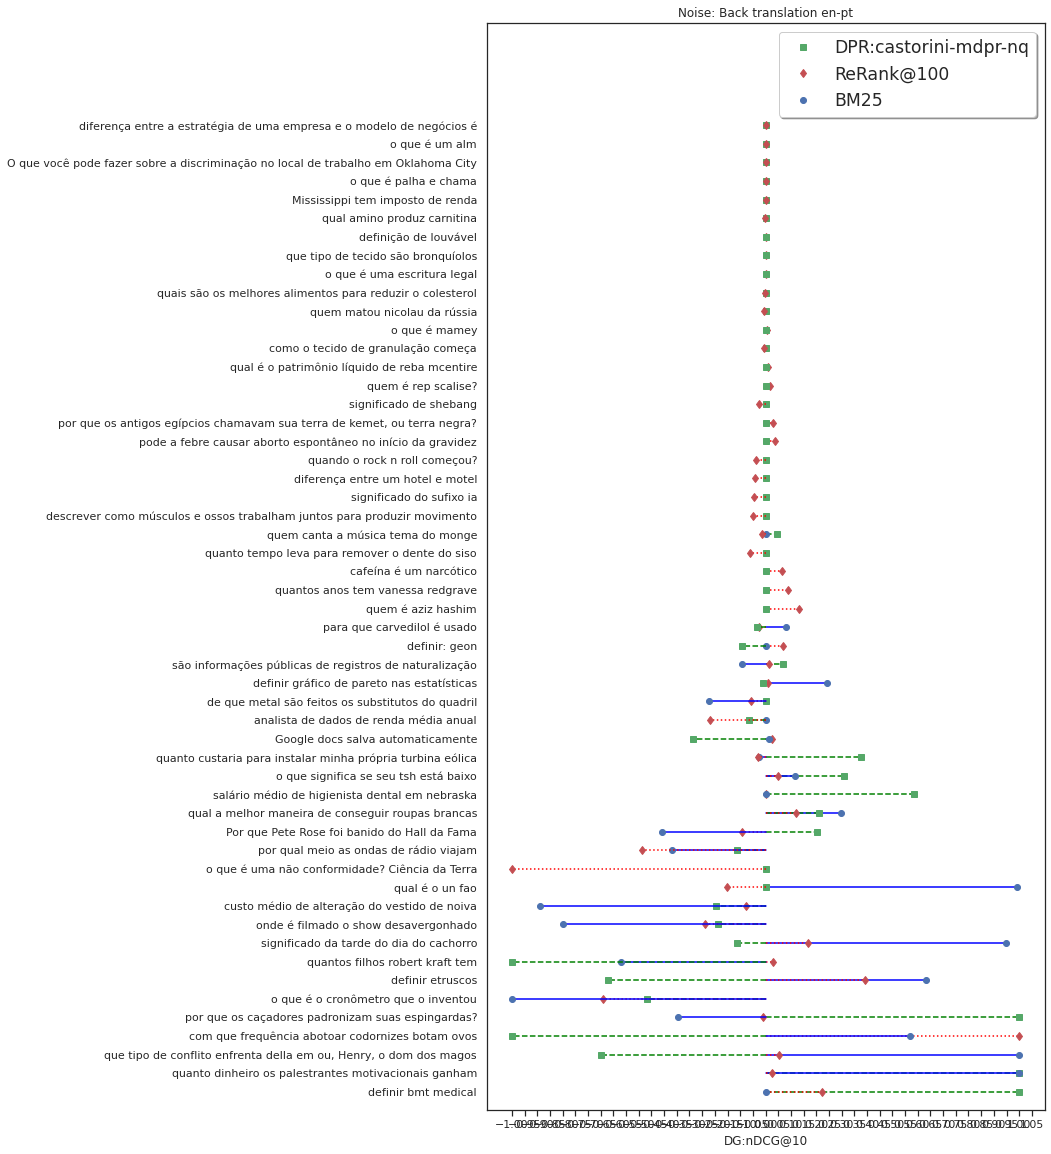

In [105]:
for noise in ['Delete: 2nd', 'Delete: penult', 'Delete: 20%',
       'Permute: last x penult','Permute: 1st x 2nd',
       'Permutate: first x last', 'Back translation en-pt']:
  build_graph(noise, noise) 

## Deleting contexts in base full, for isonomic analysis 

In [ ]:
df_dg_nDCG10 = df_dg_nDCG10.query("cod_search_context not in [1, 3]")
df_nDCG10 = df_nDCG10.query("cod_search_context not in [1, 3]")

In [ ]:
df_dg_nDCG10.shape, df_nDCG10.shape

((3162, 15), (3618, 15))

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_dg_nDCG10.query("cod_noise_kind!=0").groupby(['cod_search_context', 'search_context', 'language'],as_index=False).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

cod_search_context                                     search_context  \
                                                                          
0                  2                               DPR:facebook-nq-base   
1                  4                                               BM25   
2                  5          ReRank@100:mono-t5-castorini-base-msmarco   
3                  6                                               BM25   
4                  7                              DPR:castorini-mdpr-nq   
5                  8     ReRank@100:mono-mt5-unicamp-base-multi-msmarco   
6                  9     ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco   
7                 12  ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k   

  language     value                                                           
                mean count    median       min        max       std       var  
0       en -0.052404   425 -0.020364 -0.999987   4.060133  0.524878  0.275497  
1       en  0.056462   426  0.000000 -0.999988   9.311809  0.950782  0.903986  
2       en -0.077758   428 -0.005203 -0.999990   1.806570  0.296076  0.087661  
3       pt -0.020014   375  0.000000 -0.999987   9.271356  0.579594  0.335929  
4       pt  0.053181   374 -0.001772 -0.999989  12.790963  1.165628  1.358690  
5       pt -0.068468   378  0.000000 -0.999988   2.096240  0.308026  0.094880  
6       pt -0.100876   378 -0.014460 -0.999988   0.915624  0.271177  0.073537  
7       pt -0.090925   378  0.000000 -0.999989   0.712181  0.271021  0.073452

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_dg_nDCG10.groupby(['cod_noise_kind', 'noise_kind', 'language']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

value                  \
                                                     mean count    median   
cod_noise_kind noise_kind              language                             
1              Permute: 1st x 2nd      en        0.047289   161  0.000000   
                                       pt        0.014603   270  0.000000   
2              Permute: last x penult  en       -0.010769   160  0.000000   
                                       pt        0.018238   269  0.000000   
3              Permutate: first x last en        0.007590   160  0.000000   
                                       pt       -0.006218   269  0.000000   
4              Delete: 2nd             en       -0.117946   160 -0.044720   
                                       pt       -0.104686   268  0.000000   
5              Delete: penult          en       -0.079673   159 -0.074090   
                                       pt       -0.072787   268 -0.005649   
6              Delete: 20%             en       -0.053476   159 -0.038366   
                                       pt       -0.239665   270 -0.097466   
7              Back translation en-pt  en       -0.071061   161  0.000000   
                                       pt        0.071001   269  0.000000   
8              Typo                    en        0.080997   159  0.000000   

                                                                      \
                                                      min        max   
cod_noise_kind noise_kind              language                        
1              Permute: 1st x 2nd      en       -0.767624   4.060133   
                                       pt       -0.999108   7.476386   
2              Permute: last x penult  en       -0.917207   0.623313   
                                       pt       -0.999023   5.611328   
3              Permutate: first x last en       -0.999970   3.974044   
                                       pt       -0.999915   5.067674   
4              Delete: 2nd             en       -0.999989   5.558448   
                                       pt       -0.999989   1.042225   
5              Delete: penult          en       -0.999990   9.311809   
                                       pt       -0.999989   9.271356   
6              Delete: 20%             en       -0.999990   9.311809   
                                       pt       -0.999987   7.038340   
7              Back translation en-pt  en       -0.999970   2.999431   
                                       pt       -0.999989  12.790963   
8              Typo                    en       -0.999980   5.558448   

                                                                     
                                                      std       var  
cod_noise_kind noise_kind              language                      
1              Permute: 1st x 2nd      en        0.395552  0.156461  
                                       pt        0.487157  0.237321  
2              Permute: last x penult  en        0.164656  0.027112  
                                       pt        0.442636  0.195927  
3              Permutate: first x last en        0.364244  0.132674  
                                       pt        0.426169  0.181620  
4              Delete: 2nd             en        0.669785  0.448612  
                                       pt        0.336360  0.113138  
5              Delete: penult          en        0.892446  0.796459  
                                       pt        0.823820  0.678680  
6              Delete: 20%             en        1.014712  1.029640  
                                       pt        0.607012  0.368463  
7              Back translation en-pt  en        0.432481  0.187040  
                                       pt        0.939657  0.882955  
8              Typo                    en        0.785131  0.616431

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_dg_nDCG10.query("language=='pt'").groupby(['cod_noise_kind', 'noise_kind', 'language']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

value                  \
                                                     mean count    median   
cod_noise_kind noise_kind              language                             
1              Permute: 1st x 2nd      pt        0.014603   270  0.000000   
2              Permute: last x penult  pt        0.018238   269  0.000000   
3              Permutate: first x last pt       -0.006218   269  0.000000   
4              Delete: 2nd             pt       -0.104686   268  0.000000   
5              Delete: penult          pt       -0.072787   268 -0.005649   
6              Delete: 20%             pt       -0.239665   270 -0.097466   
7              Back translation en-pt  pt        0.071001   269  0.000000   

                                                                      \
                                                      min        max   
cod_noise_kind noise_kind              language                        
1              Permute: 1st x 2nd      pt       -0.999108   7.476386   
2              Permute: last x penult  pt       -0.999023   5.611328   
3              Permutate: first x last pt       -0.999915   5.067674   
4              Delete: 2nd             pt       -0.999989   1.042225   
5              Delete: penult          pt       -0.999989   9.271356   
6              Delete: 20%             pt       -0.999987   7.038340   
7              Back translation en-pt  pt       -0.999989  12.790963   

                                                                     
                                                      std       var  
cod_noise_kind noise_kind              language                      
1              Permute: 1st x 2nd      pt        0.487157  0.237321  
2              Permute: last x penult  pt        0.442636  0.195927  
3              Permutate: first x last pt        0.426169  0.181620  
4              Delete: 2nd             pt        0.336360  0.113138  
5              Delete: penult          pt        0.823820  0.678680  
6              Delete: 20%             pt        0.607012  0.368463  
7              Back translation en-pt  pt        0.939657  0.882955

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_dg_nDCG10.query("language=='en'").groupby(['cod_noise_kind', 'noise_kind', 'language']).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

value                  \
                                                     mean count    median   
cod_noise_kind noise_kind              language                             
1              Permute: 1st x 2nd      en        0.047289   161  0.000000   
2              Permute: last x penult  en       -0.010769   160  0.000000   
3              Permutate: first x last en        0.007590   160  0.000000   
4              Delete: 2nd             en       -0.117946   160 -0.044720   
5              Delete: penult          en       -0.079673   159 -0.074090   
6              Delete: 20%             en       -0.053476   159 -0.038366   
7              Back translation en-pt  en       -0.071061   161  0.000000   
8              Typo                    en        0.080997   159  0.000000   

                                                                               \
                                                      min       max       std   
cod_noise_kind noise_kind              language                                 
1              Permute: 1st x 2nd      en       -0.767624  4.060133  0.395552   
2              Permute: last x penult  en       -0.917207  0.623313  0.164656   
3              Permutate: first x last en       -0.999970  3.974044  0.364244   
4              Delete: 2nd             en       -0.999989  5.558448  0.669785   
5              Delete: penult          en       -0.999990  9.311809  0.892446   
6              Delete: 20%             en       -0.999990  9.311809  1.014712   
7              Back translation en-pt  en       -0.999970  2.999431  0.432481   
8              Typo                    en       -0.999980  5.558448  0.785131   

                                                           
                                                      var  
cod_noise_kind noise_kind              language            
1              Permute: 1st x 2nd      en        0.156461  
2              Permute: last x penult  en        0.027112  
3              Permutate: first x last en        0.132674  
4              Delete: 2nd             en        0.448612  
5              Delete: penult          en        0.796459  
6              Delete: 20%             en        1.029640  
7              Back translation en-pt  en        0.187040  
8              Typo                    en        0.616431

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_nDCG10.groupby(['cod_search_context', 'search_context', 'language'],as_index=False).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var'],
   'date_time_execution':['min', 'max']   })

cod_search_context                                     search_context  \
                                                                          
0                  2                               DPR:facebook-nq-base   
1                  4                                               BM25   
2                  5          ReRank@100:mono-t5-castorini-base-msmarco   
3                  6                                               BM25   
4                  7                              DPR:castorini-mdpr-nq   
5                  8     ReRank@100:mono-mt5-unicamp-base-multi-msmarco   
6                  9     ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco   
7                 12  ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k   

  language     value                                                     \
                mean count    median  min       max       std       var   
0       en  0.451078   486  0.429201  0.0  1.000000  0.272219  0.074103   
1       en  0.379750   486  0.340821  0.0  0.998167  0.266896  0.071233   
2       en  0.609292   486  0.652085  0.0  1.000000  0.267347  0.071474   
3       pt  0.351030   432  0.326156  0.0  0.950091  0.273466  0.074784   
4       pt  0.298360   432  0.271026  0.0  1.000000  0.242260  0.058690   
5       pt  0.567419   432  0.624895  0.0  1.000000  0.268510  0.072098   
6       pt  0.565119   432  0.617404  0.0  1.000000  0.267006  0.071292   
7       pt  0.555036   432  0.591071  0.0  1.000000  0.265971  0.070740   

   date_time_execution                       
                   min                  max  
0  2021-11-22 10:44:57  2021-11-22 10:47:57  
1  2021-11-22 10:40:57  2021-11-22 10:41:05  
2  2021-11-23 16:34:25  2021-11-23 22:59:16  
3  2021-12-02 19:32:47  2021-12-02 19:32:57  
4  2021-12-02 19:42:48  2021-12-02 19:44:00  
5  2021-12-02 22:25:02  2021-12-03 03:41:32  
6  2021-12-03 07:08:51  2021-12-03 12:07:18  
7  2021-12-05 21:30:56  2021-12-06 01:05:59

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df_dg_nDCG10.query("cod_noise_kind!=0").groupby(['cod_search_context', 'search_context', 'language'],as_index=False).agg({
   'value': ['mean', 'count', 'median', 'min', 'max', 'std', 'var']
   })

cod_search_context                                     search_context  \
                                                                          
0                  2                               DPR:facebook-nq-base   
1                  4                                               BM25   
2                  5          ReRank@100:mono-t5-castorini-base-msmarco   
3                  6                                               BM25   
4                  7                              DPR:castorini-mdpr-nq   
5                  8     ReRank@100:mono-mt5-unicamp-base-multi-msmarco   
6                  9     ReRank@100:mono-mt5-unicamp-base-en-pt-msmarco   
7                 12  ReRank@100:mono-ptt5-unicamp-base-pt-msmarco-100k   

  language     value                                                           
                mean count    median       min        max       std       var  
0       en -0.052404   425 -0.020364 -0.999987   4.060133  0.524878  0.275497  
1       en  0.056462   426  0.000000 -0.999988   9.311809  0.950782  0.903986  
2       en -0.077758   428 -0.005203 -0.999990   1.806570  0.296076  0.087661  
3       pt -0.020014   375  0.000000 -0.999987   9.271356  0.579594  0.335929  
4       pt  0.053181   374 -0.001772 -0.999989  12.790963  1.165628  1.358690  
5       pt -0.068468   378  0.000000 -0.999988   2.096240  0.308026  0.094880  
6       pt -0.100876   378 -0.014460 -0.999988   0.915624  0.271177  0.073537  
7       pt -0.090925   378  0.000000 -0.999989   0.712181  0.271021  0.073452